# Predicting house prices using Ensemble

---------------------------------

<font size=3.5 ><text><strong>This project builds a model that predicts price of each home in Ames, Iowa.
</strong></text></font>



<font size=3.5><strong>Here is my notebook structure</strong></font>
<br><br>
<ul>
<li>I   – <a href="#chapI">Explore data</a></li>
<li>II  - <a href="#chapII">Work with numeric features</a></li>
<li>III – <a href="#chapIII">Work with non numeric features</a></li> 
<li>IV  - <a href="#chapIV">Feature engineering</a></li>
<li>V   - <a href="#chapV">Post process features</a> </li>
<li>VI  - <a href="#chapVI">Build model</a></li>
<li>VII  - <a href="#chapVII">Select best features</a></li>
<li>VIII  - <a href="#chapVIII">Set models hyperparameters</a></li>
</ul>
<br>
<br>
<br><font size=2 ><text>The dataset is provided on the Kaggle Platform for the <b><font color='blue'>"<a href="https://www.kaggle.com/c/house-prices-advanced-regression-techniques">House Prices: Advanced Regression Techniques</a>"</font></b> competition.</text></font></br>
<br><br>
<font size = 3.5><strong>Variables in the train dataset</strong></font><br>
The platform provide 79 explanatory variables that describe aspects of residential homes in Ames, Iowa.
<br>
<br><br>
<u>Among these variables we have :</u>
<text>
<br><font color='green'><b>SalePrice</b></font> - the property's sale price in dollars. This is the <b>target variable</b> that we are trying to predict.
<br><font color='blue'>LotFrontage:</font> Linear feet of street connected to property
<br><font color='blue'>LotArea:</font> Lot size in square feet
<br><font color='blue'>Neighborhood:</font> Physical locations within Ames city limits
<br><font color='blue'>OverallQual:</font> Overall material and finish quality
<br><font color='blue'>YearBuilt:</font> Original construction date
<br><font color='blue'>TotalBsmtSF:</font> Total square feet of basement area
<br><font color='blue'>Heating:</font> Type of heating
<br><font color='blue'>1stFlrSF:</font> First Floor square feet
<br><font color='blue'>2ndFlrSF:</font> Second floor square feet
<br><font color='blue'>GrLivArea:</font> Above grade (ground) living area square feet
<br><font color='blue'>FullBath:</font> Full bathrooms above grade
<br><font color='blue'>Bedroom:</font> Number of bedrooms above basement level
<br><font color='blue'>Kitchen:</font> Number of kitchens
<br><font color='blue'>TotRmsAbvGrd:</font> Total rooms above grade (does not include bathrooms)
<br><font color='blue'>MoSold:</font> Month Sold
<br><font color='blue'>YrSold:</font> Year Sold
</text></font>




## <p id="chapI">I - Explore DATA</p>

--------------------------

--------------------------

<font size=3.5><strong>Load data and have a first look</strong></font>

--------------------

In [1]:
import pandas as pd

#Read train and test datasets
train = pd.read_csv("./train.csv")
test = pd.read_csv("./test.csv")

#Keep the train row number, it will permit to extract train futher
train_shape0 = train.shape[0]

#Set the maximum columns value to display each columns
pd.options.display.max_columns = 1000

#Have a look at the data structure
print(train.shape)
print(test.shape)
train.head()

(1460, 81)
(1459, 80)


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [2]:
#Reload datasets to define the combine dataset
#Thanks to the combined dataset we will save implementation time
train_to_combine = pd.read_csv( './train.csv')
test_to_combine = pd.read_csv( './test.csv' )

#Extract the target data from the train dataset
target = train_to_combine["SalePrice"]

#Drop the SalePrice column to concat train and test datasets
train_to_combine.drop("SalePrice", axis=1, inplace=True)
combine = train_to_combine.append(test_to_combine)
combine.reset_index(inplace=True)
combine.drop('index', inplace=True, axis=1)

#Look at the combine row number
combine.shape[0]

2919

We combine here train and test dataset to save time coding and to ensure sharing same classes in train and test datasets. 

In [3]:
train.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2

<font size=3.5><strong>Look at the target data distribution</strong></font>

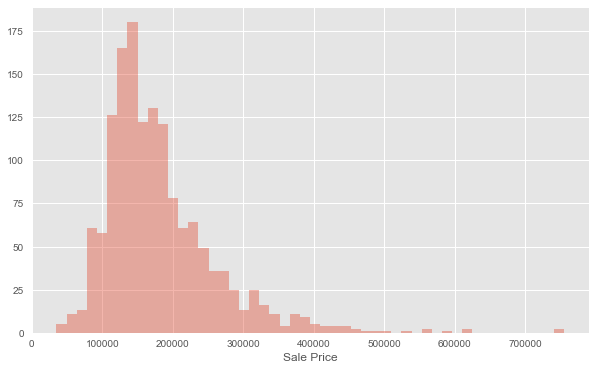

1.8828757597682129

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Configure the plot parameters
plt.style.use(style='ggplot')
plt.rcParams['figure.figsize'] = (10, 6)

#Extract the target data from the train dataset
target = train["SalePrice"]

#Display the SalePrice data shape 
sns.distplot(train.SalePrice.values, bins=50, kde=False)
plt.xlabel('Sale Price', fontsize=12)
plt.show()
target.skew()

The shape of the target data is positively skewed (right tail)
So we will have to log the target data to permit us to obtain more visibility on our graphs.

In [5]:
target.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

The house prices are distributed between : 34 900 up to 755 000 with a mean of $180921

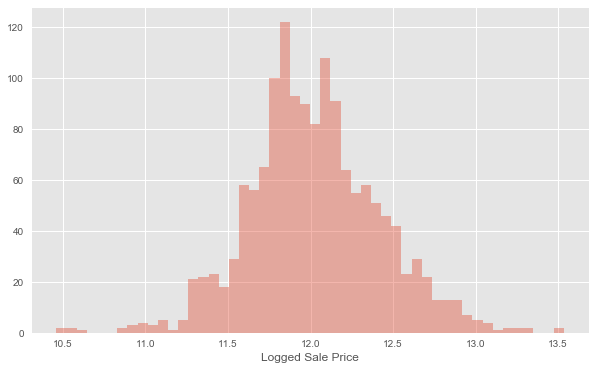

In [6]:
import numpy as np

#Log the target data and look at the new shape
target_log = np.log1p(target)
target_log.rename(index="LogSalePrice",inplace=True)
#Display the new data shape
sns.distplot(target_log, bins=50, kde=False)
plt.xlabel('Logged Sale Price', fontsize=12)
plt.show()

<font size=3.5><strong>Check columns datatypes</strong></font> 

In [7]:
#Build a dataframe of "train" data types 
dtype_df = train.dtypes.reset_index()
dtype_df.columns = ["Count", "Column Type"]
dtype_df.groupby("Column Type").aggregate('count').reset_index()

Column Type  Count
0       int64     35
1     float64      3
2      object     43

Columns are mainly Integers or Object for categorical features, the project will probably deal with Object column conversion.<br><br>
<font size=3.5><strong>Inspect missing values in the dataset</strong></font>

In [8]:
#Identify high missing values features
#Then transform feature structure into new features 
missing_df = train.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df['missing_ratio'] = missing_df['missing_count'] / train.shape[0]
missing_df[missing_df['missing_ratio']>0.8]



column_name  missing_count  missing_ratio
6         Alley           1369       0.937671
72       PoolQC           1453       0.995205
73        Fence           1179       0.807534
74  MiscFeature           1406       0.963014

4 columns have more than 80% of missing values

<font size=3.5> <strong>Check the correlations between null values and the House prices</strong></font>

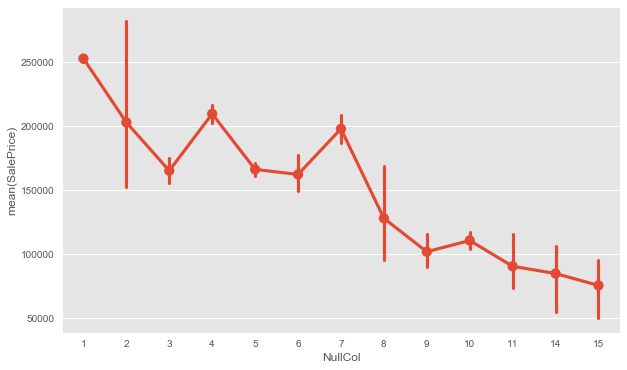

In [9]:
#Create a new feature summing the null values number for each row 
train["NullCol"] = train.isnull().sum(axis=1)

#Plot Sale Price regarding the Null Columns number  
sns.pointplot(x="NullCol", y="SalePrice", data=train)

We catched here a signal as the SalePrice are directly correlated. The more you have null values on a row the lower the price are.

In [10]:
#We add it to our combined dataframe.
combine["NullCol"]=combine.isnull().sum(axis=1) 

## <p id="chapII">II - Work with numeric features </p>

----------------------------

----------------------------


<font size=3.5><strong>Check their correlation rate with SalePrice</strong></font>


In [11]:
#Select numeric features
train["LogSalePrice"] = target_log
numeric_feature = train.select_dtypes(include=[np.number])

In [12]:
#Check how many numeric feature wenhave now  
numeric_feature.shape

(1460, 40)

We kept 38 variables among 80.
How are they correlated with the SalePrice data ?

In [13]:
numeric_feature.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice', 'NullCol', 'LogSalePrice'],
      dtype='object')

In [14]:
#Evaluate correlations between features
sale_price_cor = numeric_feature.corr()

In [15]:
#Look the more correlated features to SalePrice
print(sale_price_cor["SalePrice"].sort_values()[:5])
sale_price_cor["SalePrice"].sort_values()[-25:]

NullCol         -0.298455
KitchenAbvGr    -0.135907
EnclosedPorch   -0.128578
MSSubClass      -0.084284
OverallCond     -0.077856
Name: SalePrice, dtype: float64


BedroomAbvGr    0.168213
BsmtUnfSF       0.214479
BsmtFullBath    0.227122
LotArea         0.263843
HalfBath        0.284108
OpenPorchSF     0.315856
2ndFlrSF        0.319334
WoodDeckSF      0.324413
LotFrontage     0.351799
BsmtFinSF1      0.386420
Fireplaces      0.466929
MasVnrArea      0.477493
GarageYrBlt     0.486362
YearRemodAdd    0.507101
YearBuilt       0.522897
TotRmsAbvGrd    0.533723
FullBath        0.560664
1stFlrSF        0.605852
TotalBsmtSF     0.613581
GarageArea      0.623431
GarageCars      0.640409
GrLivArea       0.708624
OverallQual     0.790982
LogSalePrice    0.948374
SalePrice       1.000000
Name: SalePrice, dtype: float64

We have here 25 variables highly positively correlated with the Ames House Sale Price and 1 negatively correlated.

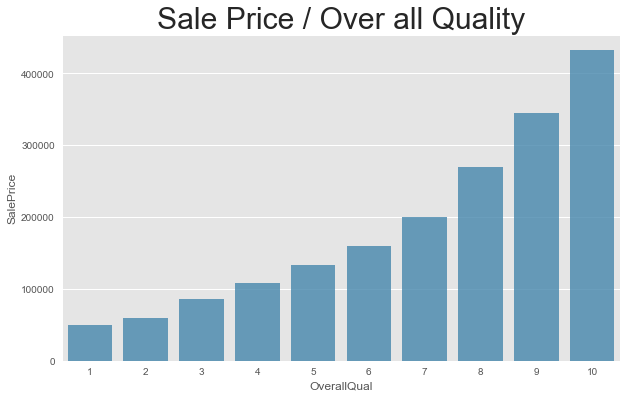

In [16]:
#Plot the overallqual to look at the SalePrice correlation identified above
#OverallQual values are goinfg from 1 to 10
color = sns.color_palette()

#Define a function to plot the Sale Price on a seaborn bar plot with different feature parameter 
def bar_plot(feature):
    feature_pivot_df = train.pivot_table(index=feature, values="SalePrice", aggfunc=np.median).reset_index()
    sns.barplot(feature_pivot_df[feature], feature_pivot_df["SalePrice"], alpha=0.8, color=color[1])
    plt.xlabel(feature)
    plt.ylabel("SalePrice")
    plt.xticks(rotation=0)
    plt.show()

plt.title("Sale Price / Over all Quality", fontsize=30)
bar_plot("OverallQual")

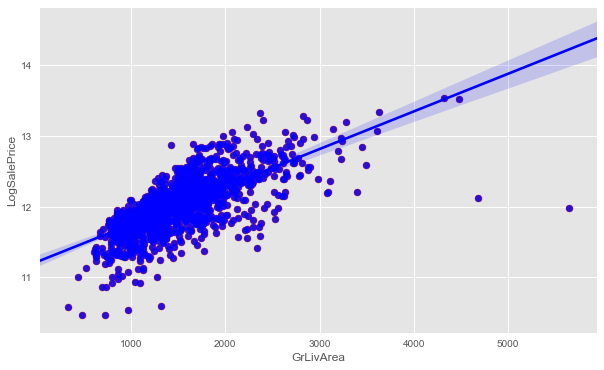

In [17]:
#Define a scatter_plot function to plot the logged Sale Price regarding different feature parameter
def scatter_plot(feature):
    plt.scatter(x=train[feature], y=target_log)
    plt.xlabel(feature)
    plt.ylabel("LogSalePrice")
    plt.xticks(rotation=0)
    sns.regplot(x=feature, y=target_log, data=train, color='blue')
    plt.show()

#Plot logged Sale Price regarding the Ground Living Area
scatter_plot("GrLivArea")


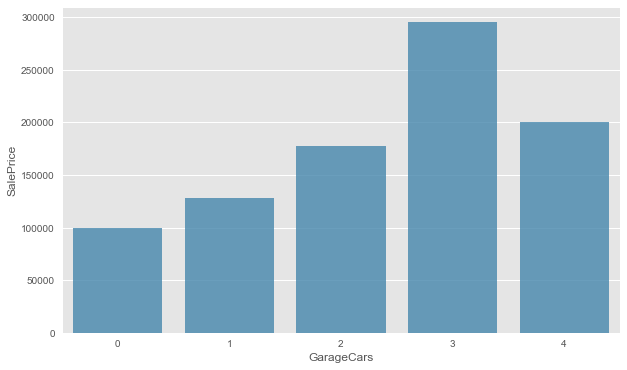

In [18]:
#Plot logged Sale Price regarding Garage Cars 
bar_plot("GarageCars")

There is linear correlation between Sale Price and GarageCars untill 3.<br>
Check how many rows are present in the train dataset having 4 Garage Cars.

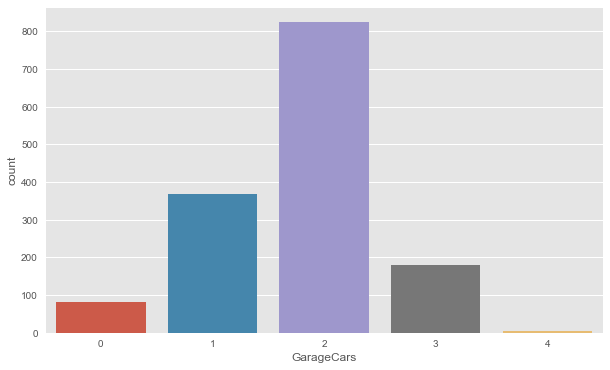

In [19]:
#Plot the "GarageCars" count by class 
sns.countplot(train["GarageCars"])

There are so few house with 4 Garage Cars that we can merge them with the ones having 3.

In [20]:
combine.loc[combine["GarageCars"]==4,"GarageCars"]=3

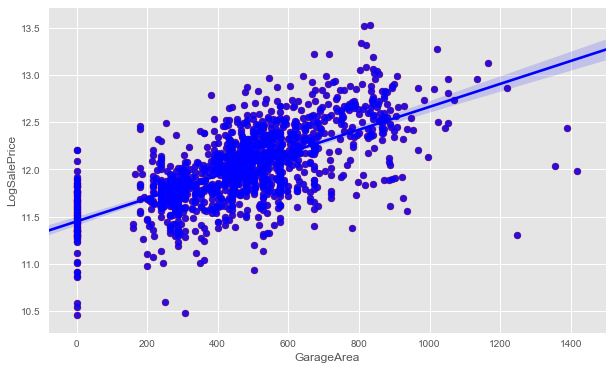

In [21]:
#Plot Logged Sale Price regarding the Garage Area
scatter_plot("GarageArea")


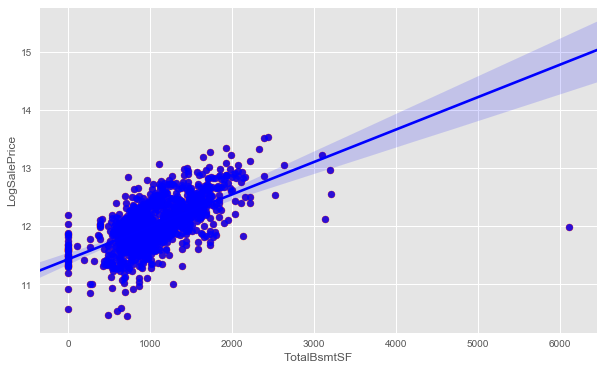

In [22]:
#What is the linearity between logged sale price and the total basement surface ?
scatter_plot("TotalBsmtSF")

<font size=3.5><strong>Find out Outliers</strong></font>

----------------------

<font size=2.5><strong>Clean the combine dataset from undesired outliers</strong></font> 

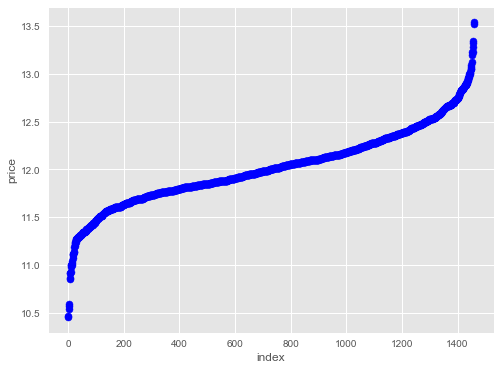

In [23]:
def show_outliers():
    plt.figure(figsize=(8,6))
    plt.scatter(range(train.shape[0]), np.sort(train.LogSalePrice.values),color='blue')
    plt.xlabel('index', fontsize=12)
    plt.ylabel('price', fontsize=12)
    plt.show()

show_outliers()


In [25]:
#Now that we have plot some important feature, we will clean some outliers to reduce noise
train_idx_to_clean = train[train["TotalBsmtSF"] > 3000].index
train.drop(train_idx_to_clean, inplace=True)

train_idx_to_clean = train[train["GarageArea"] > 1200].index
train.drop(train_idx_to_clean, inplace=True)

train_idx_to_clean = train[train["GrLivArea"] > 4000].index
train.drop(train_idx_to_clean, inplace=True)

#outlier_idx = [4,11,13,20,46,66,70,167,178,185,199, 224,261, 309,313,318, 349,412,423,440,454,477,478, 523,540, 581,588,595,654,688, 691, 774, 798, 875, 898,926,970,987,1027,1109, 1169,1182,1239, 1256,1298,1324,1353,1359,1405,1442,1447]
outlier_idx = [185, 581,1324]
train.drop(train.index[outlier_idx],inplace=True)

#Re-define train length
train_shape0 = train.shape[0]

#Extract new target_log
target_log = train["LogSalePrice"]


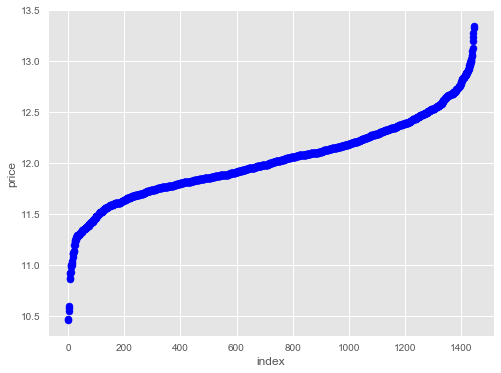

In [26]:
show_outliers()

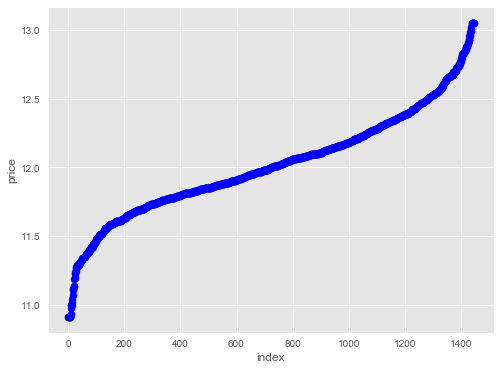

In [27]:
#Remove extreme values
def remove_outliers2(df):
    llimit = np.percentile(df["LogSalePrice"],0.5)
    ulimit = np.percentile(df["LogSalePrice"],99.5)
    df.loc[df["LogSalePrice"]<llimit,"LogSalePrice"]=llimit
    df.loc[df["LogSalePrice"]>ulimit, "LogSalePrice"]=ulimit
    
    return df

train = remove_outliers2(train)


#Clean train from Sale Price before merging with test to build "combine"
test["LogSalePrice"]=0
test["SalePrice"]=0

#Rebuild the combine dataframe
combine = train.append(test)
combine["NullCol"]=combine.isnull().sum(axis=1) 
combine.drop("LogSalePrice",axis=1,inplace=True)
combine.drop("SalePrice",axis=1,inplace=True)


#Look at the result
show_outliers()

<font size=3.5><strong>Fill the missing values</strong></font>

----------------

<font size=2.5><strong>Look for the features requiring to be fullfilled</strong></font>

In [28]:
# How many numeric_feature have missing values
# we move on the combine scope of data to fill null values and then engineer features in a second part
numeric_feature = combine.select_dtypes(include=[np.number])
numeric_feature.isnull().sum()


1stFlrSF           0
2ndFlrSF           0
3SsnPorch          0
BedroomAbvGr       0
BsmtFinSF1         1
BsmtFinSF2         1
BsmtFullBath       2
BsmtHalfBath       2
BsmtUnfSF          1
EnclosedPorch      0
Fireplaces         0
FullBath           0
GarageArea         1
GarageCars         1
GarageYrBlt      159
GrLivArea          0
HalfBath           0
Id                 0
KitchenAbvGr       0
LotArea            0
LotFrontage      484
LowQualFinSF       0
MSSubClass         0
MasVnrArea        23
MiscVal            0
MoSold             0
NullCol            0
OpenPorchSF        0
OverallCond        0
OverallQual        0
PoolArea           0
ScreenPorch        0
TotRmsAbvGrd       0
TotalBsmtSF        1
WoodDeckSF         0
YearBuilt          0
YearRemodAdd       0
YrSold             0
dtype: int64

Look at the heatmap to find if other variable could be an input to these variables values predictions.

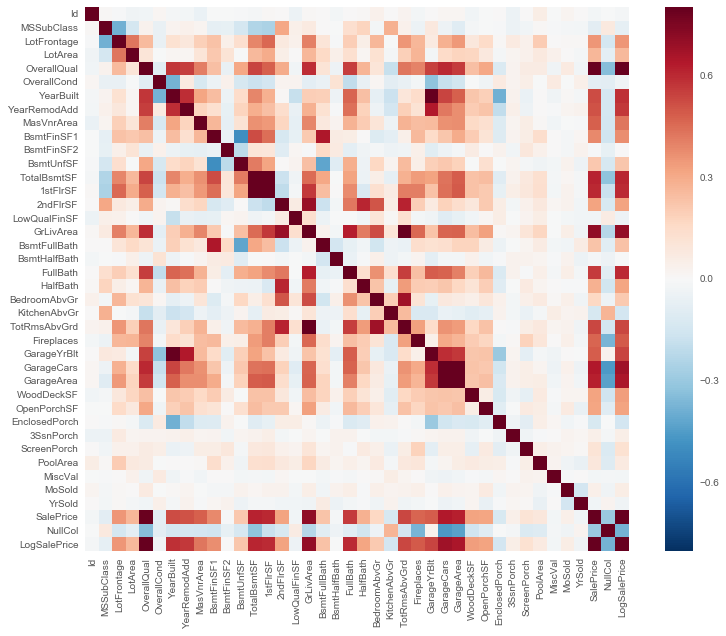

In [29]:
#Build a heatmap to cheack numeric feature correlations 
ax = plt.subplots(figsize=(13, 10))
sns.heatmap(sale_price_cor, vmin=-0.8, vmax=0.8, square=True)

<font size=3.5><strong>Thanks to the heatmap we can identify these correlations :</strong></font><br><br>
<u>Here to fill missing values :</u>
- LotFrontage is corelated to the "LotArea" and the "1stFlrSF"
- GarageYrBlt is correlated to the variables "YearBuilt" and "YearRemodAdd" 
- MasVnrArea is correlated to the "OverallQual", "TotalBsmntSF" and "GrLivArea"

<br>
<u>Here to create new features :</u>
- BsmtFinSF1/TotalBsmtSF
- TotRmsAbvGrd/GrLivArea
- BedroomAbvGrd /TotRmsAbvGrd
- GarageYrBuilt/YrBuilt
- YearRemodAdd/YrBuilt
- GarageCars/GarageArea
- LotFrontage/1stFlrArea


<strong>Complete "Lot Frontage" data</strong>

In [30]:
from sklearn.linear_model import LinearRegression

#Use linearRegression to fillna 
def predict_null_values(df,feature_to_predict, feature_input):
    #Define the dataset to train and predict
    x_train_feature = df.loc[df[feature_to_predict].notnull(), feature_input]
    y_train_feature = df.loc[df[feature_to_predict].notnull(), feature_to_predict]
    x_test_feature = df.loc[df[feature_to_predict].isnull(), feature_input]
    
    #Predict Lot Frontage null values
    lr = LinearRegression()
    lr.fit(x_train_feature, y_train_feature)
    feature_predictions = lr.predict(x_test_feature)
    return feature_predictions

#Process LotFrontage
def process_lot_frontage(df):
    #First of all we catch signal here of no LotFrontage recorded in the initial dataset
    df["HasLotFrontage"]=0
    df.loc[ df["LotFrontage"].notnull(),"HasLotFrontage"]=1
    
    #Then affect predictions with linearRegression and LotArea + 1stFlrSF variable
    df.loc[df["LotFrontage"].isnull(),"LotFrontage"] = predict_null_values(df,"LotFrontage", ["LotArea","1stFlrSF"])
    
    return df

combine = process_lot_frontage(combine)


<font size=3.5><strong>Complete GarageYrBlt with the variables "YearBuilt" and "YearRemodAdd"</strong></font>

In [31]:
#Process Garage Year Built
def process_garage_year_built(df):
    df.loc[df["GarageYrBlt"].isnull(),"GarageYrBlt"] = predict_null_values(df,"GarageYrBlt", ["YearBuilt","YearRemodAdd"])
    return df

combine = process_garage_year_built(combine)

In [32]:
#Process GarageCars missing values with median value group by GarageArea
combine["GarageCars"].fillna(0,inplace=True)
garage_area_median = combine.groupby('GarageCars')['GarageArea'].median()

combine.loc[combine['GarageArea'].isnull(), 'GarageArea'] = combine.loc[combine['GarageArea'].isnull(), 'GarageCars'].apply(lambda x : garage_area_median.get(x))
combine['GarageArea'].isnull().sum()

0

<font size=3.5><strong>Complete missing MasVnrArea values with the "OverallQual", "TotalBsmntSF" and "GrLivArea"</strong></font>

In [33]:
#Affect the MasVnrArea predictions to the train dataset
combine.loc[combine["MasVnrArea"].isnull(),"MasVnrArea"] = predict_null_values(combine,"MasVnrArea", ["OverallQual","GarageYrBlt"])


<font size=3.5><strong>Fill Null Basement data</strong></font>

In [34]:
#Fill Basement feature thanks to the feature interactions
combine.loc[((combine["TotalBsmtSF"].isnull()) & (combine["BsmtFinSF1"].isnull())),"BsmtFinSF1"]=0
combine.loc[((combine["TotalBsmtSF"].isnull()) & (combine["BsmtFinSF2"].isnull())),"BsmtFinSF2"]=0
combine.loc[((combine["TotalBsmtSF"].isnull()) & (combine["BsmtUnfSF"].isnull())),"BsmtUnfSF"]=0
combine.loc[combine["BsmtFullBath"].isnull(),"BsmtFullBath"]=0
combine.loc[combine["BsmtHalfBath"].isnull(),"BsmtHalfBath"]=0

idx_null = combine.loc[combine["TotalBsmtSF"].isnull()].index
combine.loc[combine["TotalBsmtSF"].isnull(),"TotalBsmtSF"] = 0

<font size=3.5><strong>Process GrLivArea</strong></font>          


In [35]:
#Insert the median value of GrLivArea by Neighborhood
grlivarea_by_neigh_median = combine.groupby("Neighborhood")["GrLivArea"].median()
combine.loc[combine["GrLivArea"].isnull(),"GrLivArea"]=combine.loc[combine["GrLivArea"].isnull(),"Neighborhood"].apply(lambda x:grlivarea_by_neigh_median.get(x))

## <p id="chapIII">III - Work with non numeric features</p>

------------------------------------------

------------------------------------------

In [36]:
#Select the non numeric features
non_numeric_feature = combine.select_dtypes(exclude=[np.number])

In [37]:
#Look this column list
non_numeric_feature.columns

Index(['Alley', 'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'BsmtQual', 'CentralAir', 'Condition1', 'Condition2',
       'Electrical', 'ExterCond', 'ExterQual', 'Exterior1st', 'Exterior2nd',
       'Fence', 'FireplaceQu', 'Foundation', 'Functional', 'GarageCond',
       'GarageFinish', 'GarageQual', 'GarageType', 'Heating', 'HeatingQC',
       'HouseStyle', 'KitchenQual', 'LandContour', 'LandSlope', 'LotConfig',
       'LotShape', 'MSZoning', 'MasVnrType', 'MiscFeature', 'Neighborhood',
       'PavedDrive', 'PoolQC', 'RoofMatl', 'RoofStyle', 'SaleCondition',
       'SaleType', 'Street', 'Utilities'],
      dtype='object')

<font size=3.5><strong> Fill missing values</strong></font>

In [38]:
#For each feature evaluate the number of rows to complete
non_numeric_feature.isnull().sum()

Alley            2708
BldgType            0
BsmtCond           82
BsmtExposure       82
BsmtFinType1       79
BsmtFinType2       79
BsmtQual           81
CentralAir          0
Condition1          0
Condition2          0
Electrical          1
ExterCond           0
ExterQual           0
Exterior1st         1
Exterior2nd         1
Fence            2337
FireplaceQu      1419
Foundation          0
Functional          2
GarageCond        159
GarageFinish      159
GarageQual        159
GarageType        157
Heating             0
HeatingQC           0
HouseStyle          0
KitchenQual         1
LandContour         0
LandSlope           0
LotConfig           0
LotShape            0
MSZoning            4
MasVnrType         24
MiscFeature      2802
Neighborhood        0
PavedDrive          0
PoolQC           2898
RoofMatl            0
RoofStyle           0
SaleCondition       0
SaleType            1
Street              0
Utilities           2
dtype: int64

In [39]:
#Process Alley
#Keep the row having Alley data recorded as a signal
combine["HasAlley"]=1
combine.loc[ combine["Alley"].isnull(), "HasAlley"]=0

#Clean the fataset from Alley feature
del combine["Alley"]

<font size=3.5> <strong>Features related to Basement</strong></font>

In [40]:
#Process Basement related features
combine.loc[combine["BsmtQual"].isnull(),["BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2"]]="NA"

#There is still one row with BsmtExposure and BsmtFinType2, BsmtCond nulls
combine.loc[combine["BsmtFinType2"].isnull(),["BsmtFinSF1","BsmtFinSF2","BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2"]]

#We will affect Unf for this row, but not on the tests dataset as it should be a specific case
combine.loc[combine["BsmtFinType2"].isnull(),"BsmtFinType2"]="Unf"

#Fill the BsmtExposure
combine.loc[combine["BsmtExposure"].isnull(),"BsmtExposure"]="Unf"

#Fill BsmtCond with Gd as it is the more common value
combine["BsmtCond"].fillna("Gd",inplace=True)

In [41]:
#As we have no Pool when PoolQC is null we will affect NA value and keep a trace with the feature HasPool 
combine["HasPool"]=1
combine.loc[combine["PoolQC"].isnull(),"HasPool"]=0

#Clean the dataset with PoolQC
del combine["PoolQC"]

#Mark the House without Fence indicated
combine["HasFence"]=1
combine.loc[combine["Fence"].isnull(),"HasFence"]=0

#Remove Fence column
del combine["Fence"]

#create the MiscFeature feature
combine["HasMiscFeature"]=1
combine.loc[combine["MiscFeature"].isnull(),"HasMiscFeature"]=0

#Remove MiscFeature from the dataset
del combine["MiscFeature"]

So, now, we still have data to fill 
- KitchenQual  Kitchen quality from Excelent to Poor, has 1 null value. TA is the most common Kitchen Quality value.
- Functional   Functional: Home functionality (Assume typical unless deductions are warranted) 2 null values
- SaleType     1 null value to set to "Normal"
- Exterior1st  Exterior covering on house 1 column row to set to "VinylSd" (most common value) 
- Exterior2nd  Exterior covering on house (if more than one material) 1 column row to set to "VinylSd" (Most common value)
- MSZoning     Identifies the general zoning classification of the sale : 4 null values to set on the most common value: "RL" for Residential Low density 
- Utilities    Type of utilities available : 2 null values, set "AllPub" as it is the only value affected

In [42]:
#Fill data with the most common values
combine["KitchenQual"].fillna("TA",inplace=True)
combine["Functional"].fillna("Typ",inplace=True)
combine["SaleType"].fillna("Oth",inplace=True)
combine["Exterior1st"].fillna("VinylSd",inplace=True)
combine["Exterior2nd"].fillna("VinylSd",inplace=True)
combine["MSZoning"].fillna("RL",inplace=True)
combine["Utilities"].fillna("AllPub",inplace=True)
combine["Electrical"].fillna("SBrkr",inplace=True)
combine["MasVnrType"].fillna("None",inplace=True)
combine["FireplaceQu"].fillna("NA",inplace=True)

#There are all new so we will affect NA to all of them
for col in ["GarageType","GarageFinish","GarageCond","GarageQual"]:
    combine.loc[combine["GarageQual"].isnull(),col] = "NA"


In [43]:
combine.select_dtypes(include=[np.number]).isnull().sum()

1stFlrSF          0
2ndFlrSF          0
3SsnPorch         0
BedroomAbvGr      0
BsmtFinSF1        0
BsmtFinSF2        0
BsmtFullBath      0
BsmtHalfBath      0
BsmtUnfSF         0
EnclosedPorch     0
Fireplaces        0
FullBath          0
GarageArea        0
GarageCars        0
GarageYrBlt       0
GrLivArea         0
HalfBath          0
Id                0
KitchenAbvGr      0
LotArea           0
LotFrontage       0
LowQualFinSF      0
MSSubClass        0
MasVnrArea        0
MiscVal           0
MoSold            0
NullCol           0
OpenPorchSF       0
OverallCond       0
OverallQual       0
PoolArea          0
ScreenPorch       0
TotRmsAbvGrd      0
TotalBsmtSF       0
WoodDeckSF        0
YearBuilt         0
YearRemodAdd      0
YrSold            0
HasLotFrontage    0
HasAlley          0
HasPool           0
HasFence          0
HasMiscFeature    0
dtype: int64

## <p id="chapIV">IV - Feature engineering</p>

------------------

------------------

<font size=3.5><strong>Features identified in the heatmap above:</strong></font> 

-----------------------------------------------------------------------------------
- BsmtFinSF1/TotalBsmtSF
- TotRmsAbvGrd/GrLivArea
- BedroomAbvGrd /TotRmsAbvGrd
- GarageYrBuilt/YrBuilt
- YearRemodAdd/YrBuilt
- GarageCars/GarageArea
- LotFrontage/1stFlrArea

+ TotalBathRoom/Bedroom, that is more or less the number of bathroom a person living in the house have.

In [45]:
#Return the row cell value divided by the feature max value 
def feature_fraction(col1,col2):
    return combine[col1]/combine[col2].apply(lambda x : max(x,1))

combine ["BsmtFinSF1ByTotalBsmtSF"] = feature_fraction("BsmtFinSF1","TotalBsmtSF")

combine ["TotRmsAbvGrdByGrLivArea"] = feature_fraction("TotRmsAbvGrd","GrLivArea")

combine ["GrLivAreaByLotArea"] = feature_fraction("GrLivArea","LotArea")

combine ["BedroomAbvGrdByTotRmsAbvGrd"] = feature_fraction("BedroomAbvGr","TotRmsAbvGrd") 

combine ["GarageYrBuiltByYrBuilt"] = feature_fraction("GarageYrBlt","YearBuilt") 

combine ["YearRemodAddByYrBuilt"] = feature_fraction("YearRemodAdd","YearBuilt") 

combine ["GarageCarsByGarageArea"] = feature_fraction("GarageCars","GarageArea")  

combine ["LotFrontageBy1stFlrArea"] =  feature_fraction("LotFrontage","1stFlrSF") 

#combine["OverAllQuaTimeCond"] = combine["OverallQual"] * combine["OverallCond"]
combine["OverAllQuaPlusCond"] = combine["OverallQual"] + combine["OverallCond"]

#Evaluate GrLivArea and LotArea with the neighborhood meadian value
combine["GrLivAreaByNeighMedian"] = combine["GrLivArea"] / combine["Neighborhood"].apply(lambda x : grlivarea_by_neigh_median.get(x))

#The same for LotArea
lotarea_by_neigh_median = combine.groupby("Neighborhood")["LotArea"].median()
combine["LotAreaByNeighMedian"] = combine["LotArea"] / combine["Neighborhood"].apply(lambda x : lotarea_by_neigh_median.get(x))


<font size=3.5><strong>Add the total number of pieces above the grade in the house </strong></font><br>
TotRmsAbvGrd + Bathrooms

In [46]:
combine["TotalPiecesAbvGr"] = combine["FullBath"] + combine["HalfBath"] + combine["TotRmsAbvGrd"]
combine ["TotalPiecesAbvGrByGrLivArea"] = feature_fraction("TotalPiecesAbvGr","GrLivArea") 

<font size=3.5><strong>Let's have a look at the house type</strong></font>
<br><br>
<strong>MSSubClass: Identifies the type of dwelling involved in the sale.	</strong><br>
<u>Here are some values :</u><br>
20 :	1-STORY 1946 & NEWER ALL STYLES<br>
30 :	1-STORY 1945 & OLDER<br>
40 :	1-STORY W/FINISHED ATTIC ALL AGES<br>
70 :	2-STORY 1945 & OLDER    <br>   
      
<strong>HouseStyle: Style of dwelling</strong><br>
<u>Some values :</u><br>
1Story	: One story<br>
1.5Fin	: One and one-half story: 2nd level finished<br>
1.5Unf	: One and one-half story: 2nd level unfinished<br>
2Story	: Two story<br>


In [47]:
import re
#Extract floors in the house from the HouseStyle column
#def get_floors(hsstyle):
#    if hsstyle.startswith("S"):
#        return 1
#    if hsstyle.startswith("1.5"):
#        return 1.5
#    if hsstyle.startswith("1"):
#        return 1
#    if hsstyle.startswith("2.5"):
#        return 2.5
#    if hsstyle.startswith("2"):
#        return 2
    
#Extract the number of floors from the HouseStyle        
#combine["Floors"] = combine["HouseStyle"].apply(get_floors)   

#Clean the combine dataset
combine.drop('MSSubClass', axis = 1)
#combine.drop('HouseStyle', axis = 1)

1stFlrSF  2ndFlrSF  3SsnPorch  BedroomAbvGr BldgType BsmtCond  \
0          856       854          0             3     1Fam       TA   
1         1262         0          0             3     1Fam       TA   
2          920       866          0             3     1Fam       TA   
3          961       756          0             3     1Fam       Gd   
4         1145      1053          0             4     1Fam       TA   
5          796       566        320             1     1Fam       TA   
6         1694         0          0             3     1Fam       TA   
7         1107       983          0             3     1Fam       TA   
8         1022       752          0             2     1Fam       TA   
9         1077         0          0             2   2fmCon       TA   
10        1040         0          0             3     1Fam       TA   
11        1182      1142          0             4     1Fam       TA   
12         912         0          0             2     1Fam       TA   
13        1494         0          0             3     1Fam       TA   
14        1253         0          0             2     1Fam       TA   
15         854         0          0             2     1Fam       TA   
16        1004         0          0             2     1Fam       TA   
17        1296         0          0             2   Duplex       NA   
18        1114         0          0             3     1Fam       TA   
19        1339         0          0             3     1Fam       TA   
20        1158      1218          0             4     1Fam       TA   
21        1108         0          0             3     1Fam       TA   
22        1795         0          0             3     1Fam       TA   
23        1060         0          0             3   TwnhsE       TA   
24        1060         0          0             3     1Fam       TA   
25        1600         0          0             3     1Fam       TA   
26         900         0          0             3     1Fam       TA   
27        1704         0          0             3     1Fam       TA   
28        1600         0          0             2     1Fam       TA   
29         520         0          0             1     1Fam       TA   
...        ...       ...        ...           ...      ...      ...   
1429       641         0          0             2     1Fam       TA   
1430       967       671          0             4     1Fam       TA   
1431       729         0          0             2     1Fam       NA   
1432      1060       336          0             4   2fmCon       TA   
1433       576       360          0             2     1Fam       Fa   
1434      1778         0          0             2   TwnhsE       TA   
1435      1646         0          0             2   TwnhsE       TA   
1436      1625         0          0             3     1Fam       TA   
1437      1664         0          0             4   Duplex       TA   
1438      1491         0          0             3     1Fam       TA   
1439      1210         0          0             3     1Fam       TA   
1440      1650         0          0             2     1Fam       TA   
1441      1403         0          0             2     1Fam       TA   
1442      1960         0          0             3     1Fam       Gd   
1443      1838         0          0             3     1Fam       TA   
1444      1600         0          0             3     1Fam       NA   
1445      1368         0          0             2   Duplex       TA   
1446       616       688          0             3   TwnhsE       TA   
1447       874         0          0             3     1Fam       TA   
1448      1652         0          0             4   Duplex       TA   
1449       630         0          0             1    Twnhs       TA   
1450       546       546          0             3   TwnhsE       TA   
1451      1360         0          0             3     1Fam       TA   
1452       546       546          0             3    Twnhs       TA   
1453       546       546      

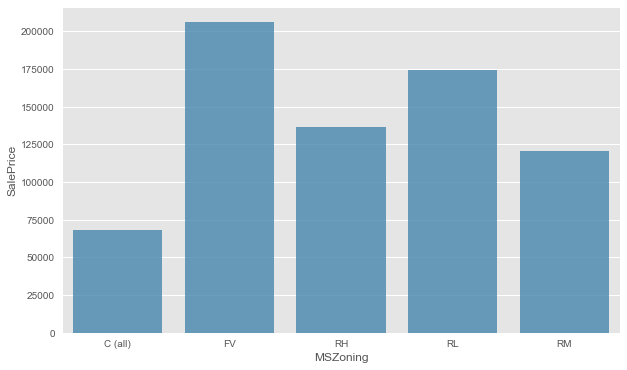

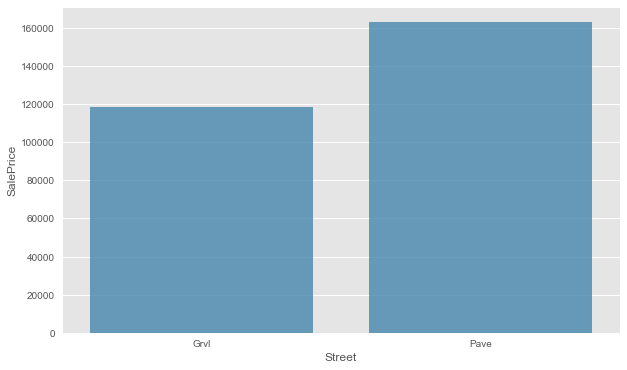

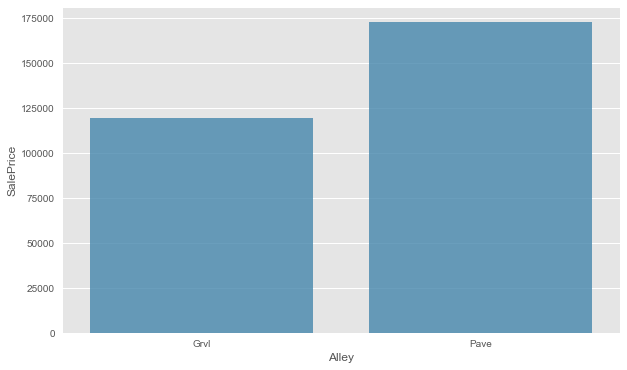

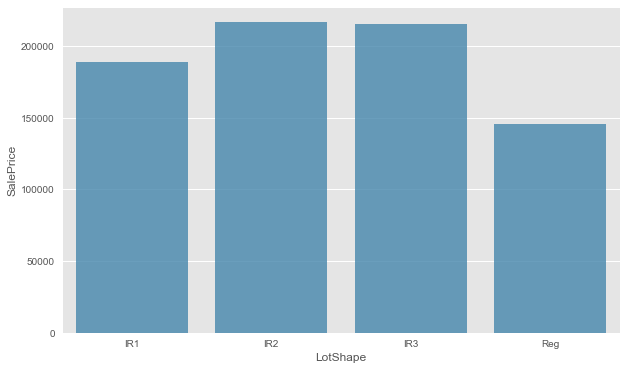

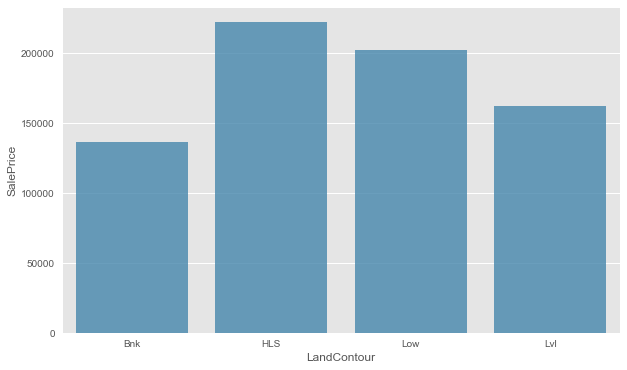

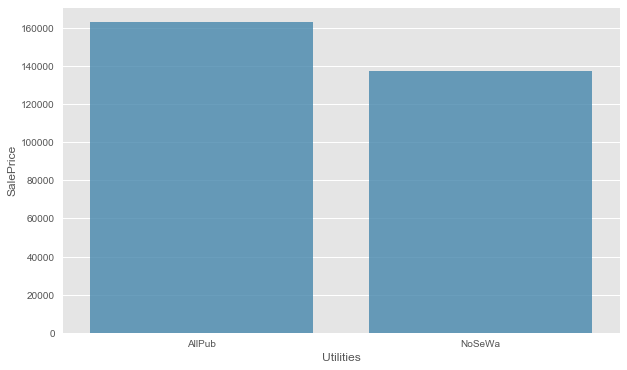

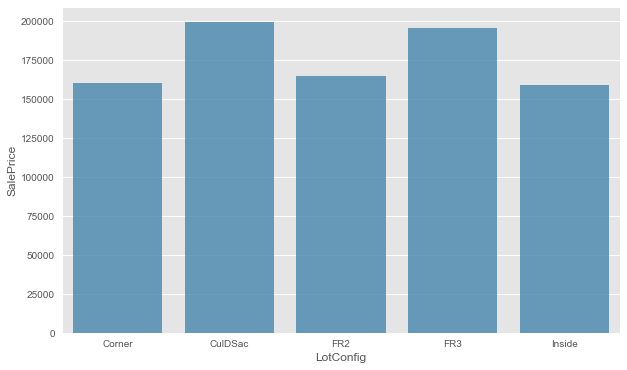

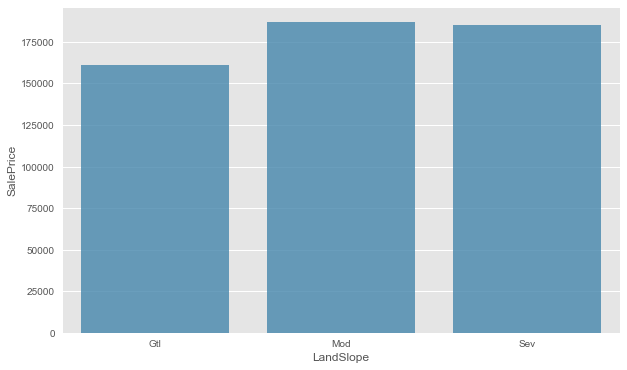

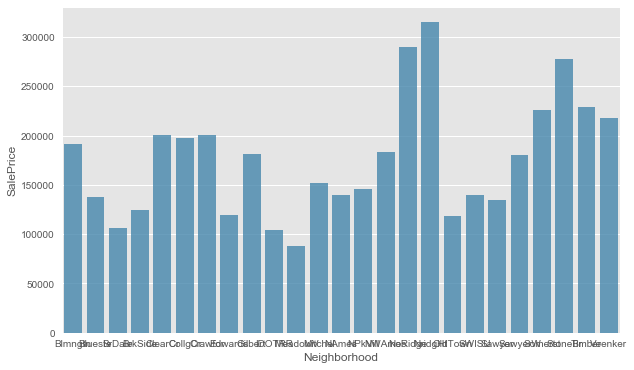

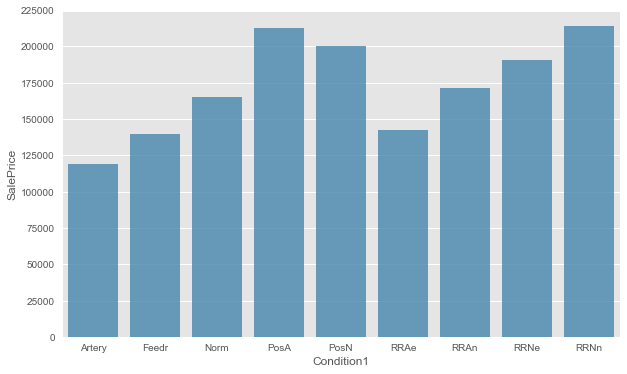

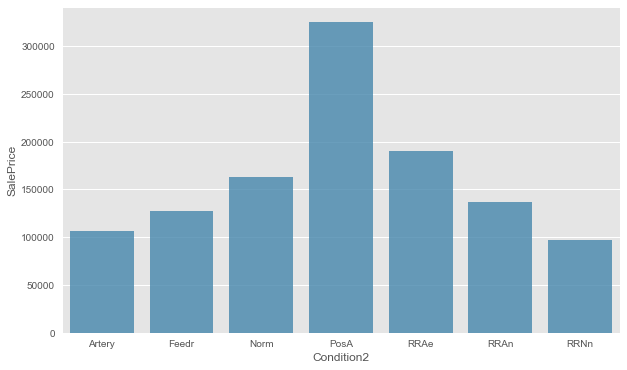

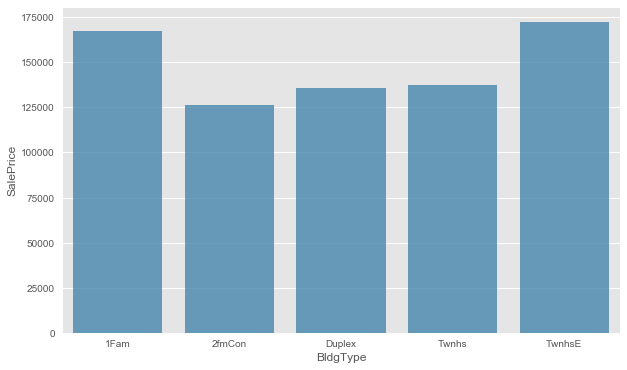

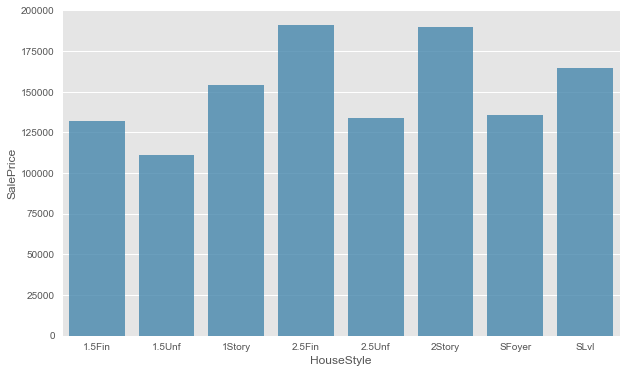

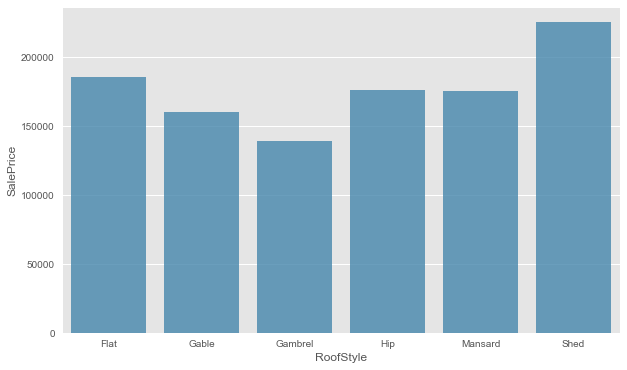

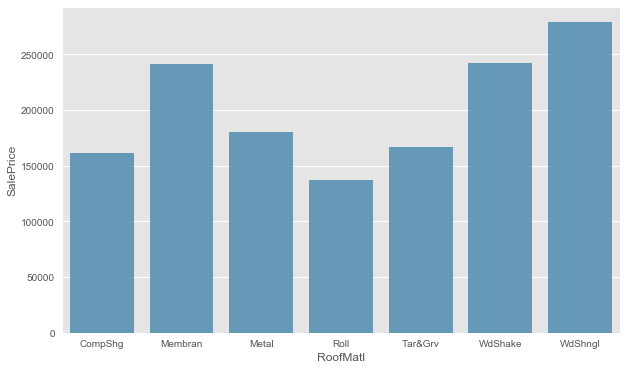

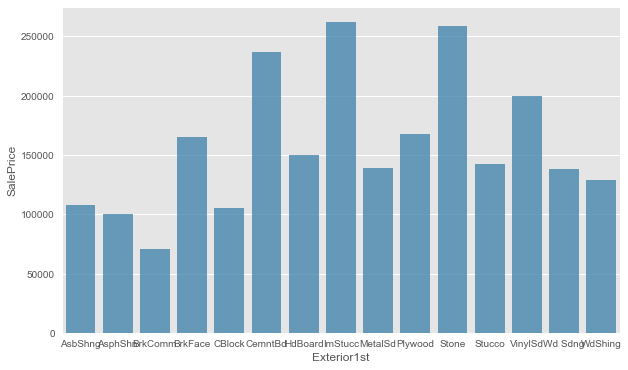

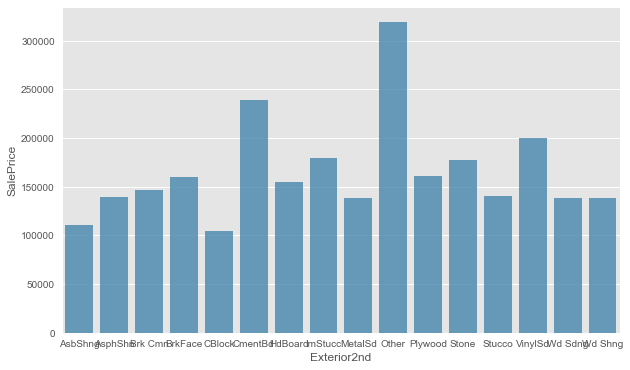

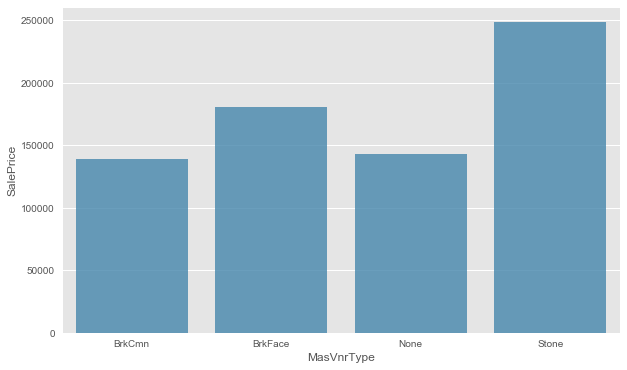

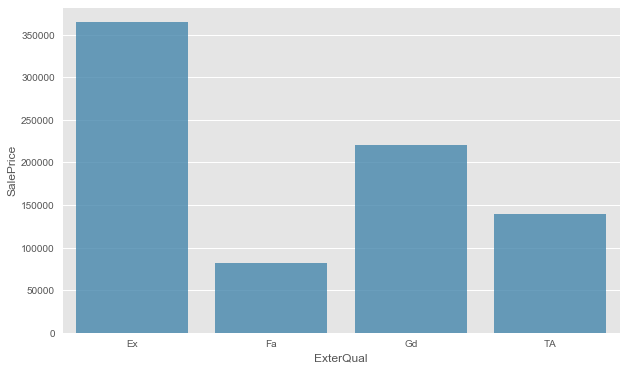

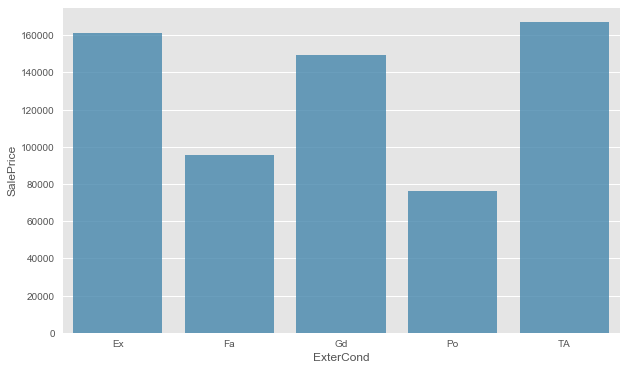

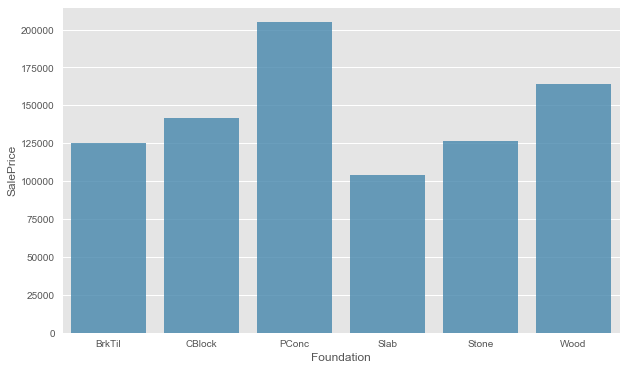

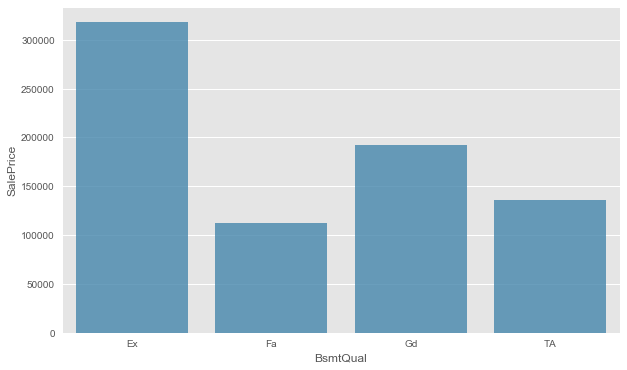

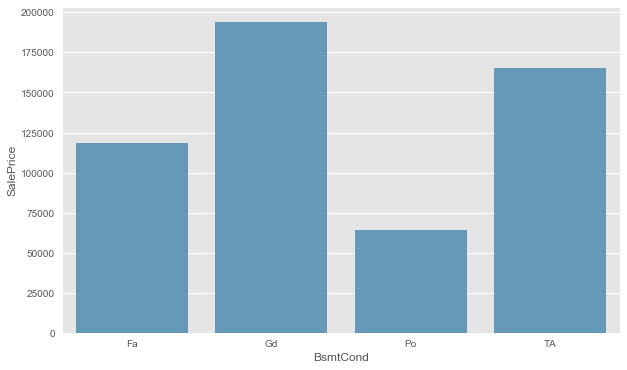

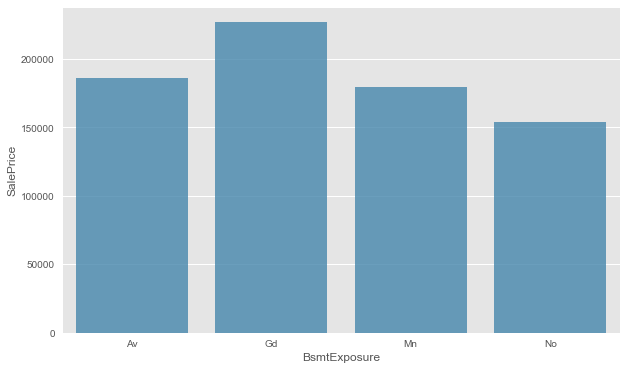

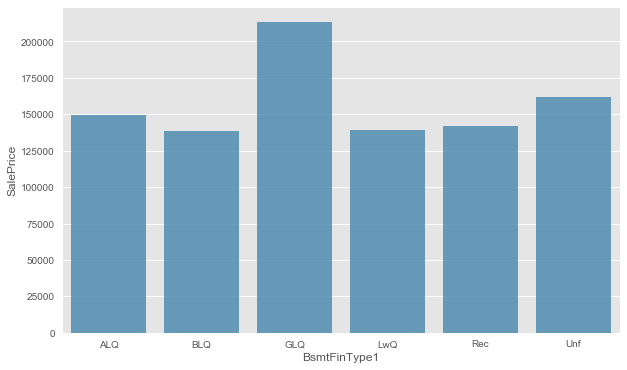

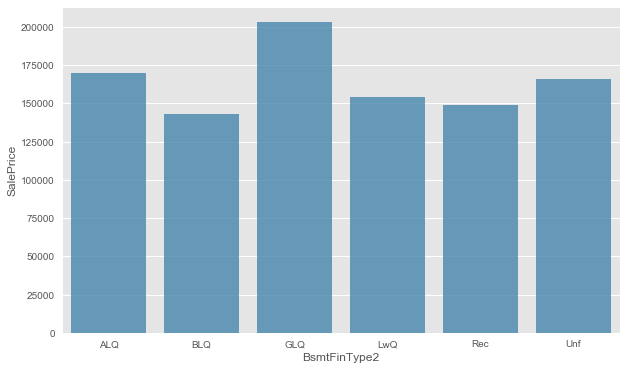

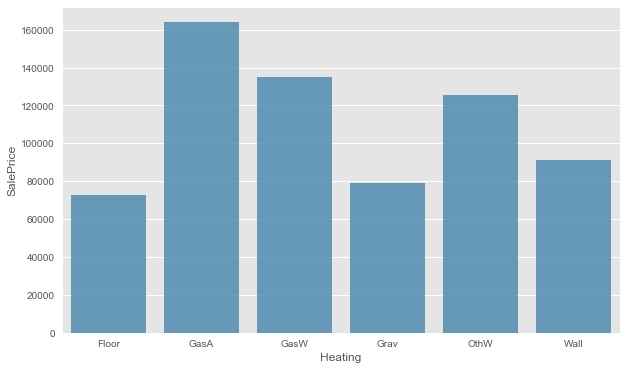

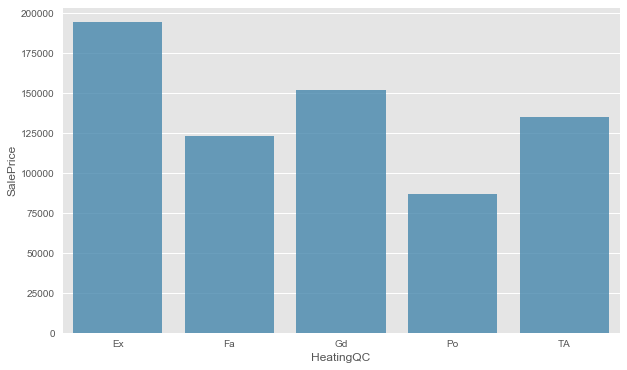

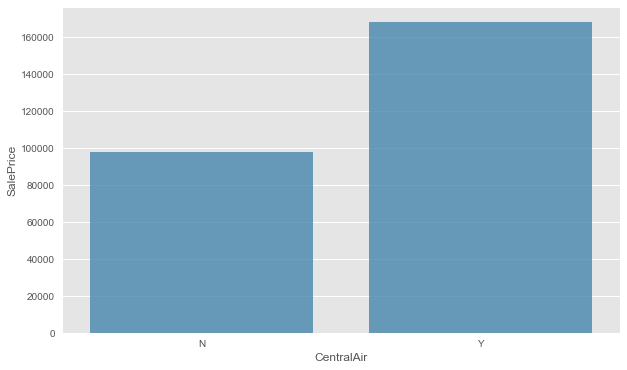

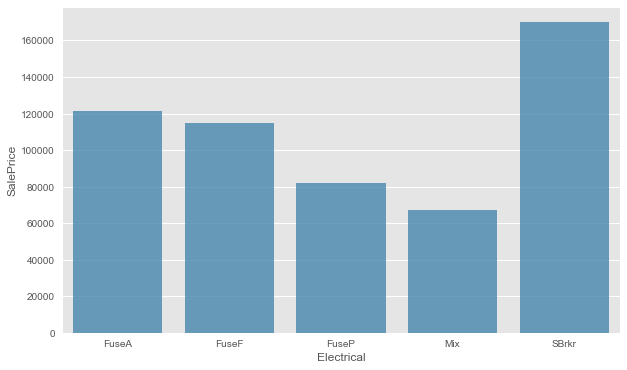

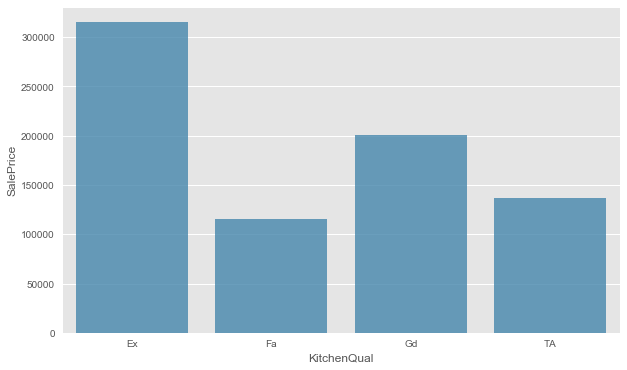

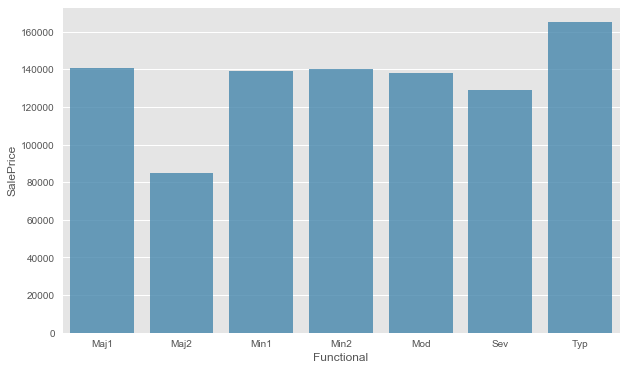

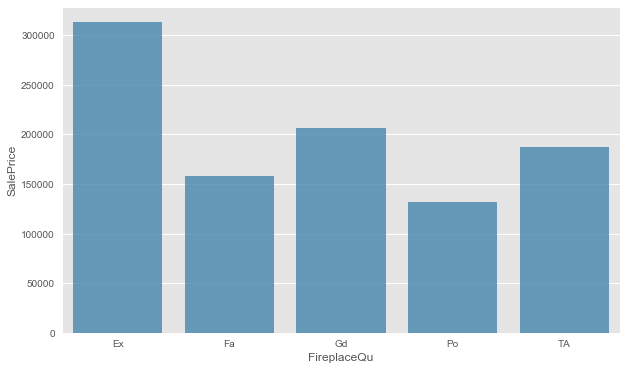

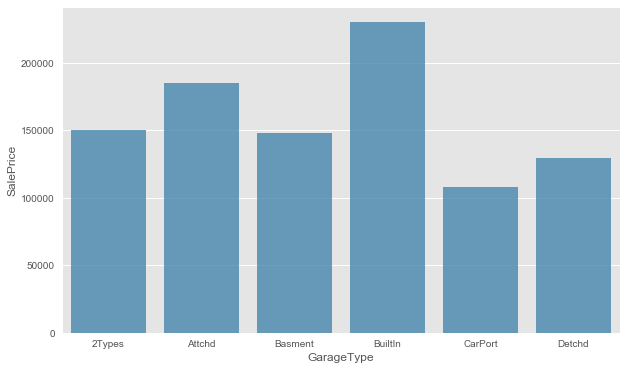

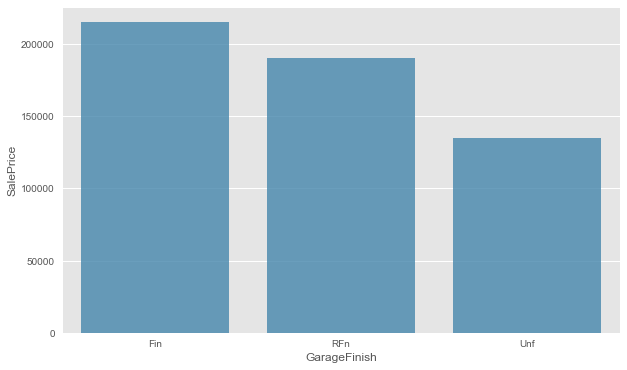

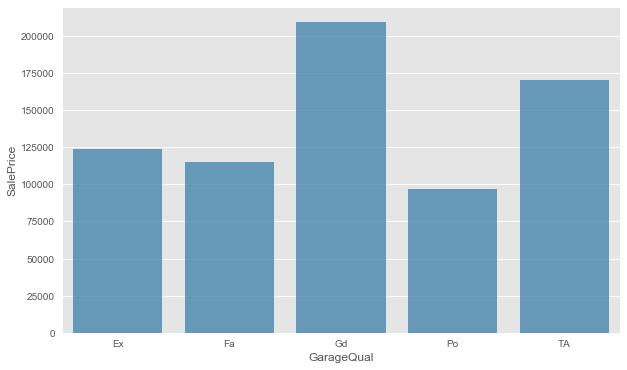

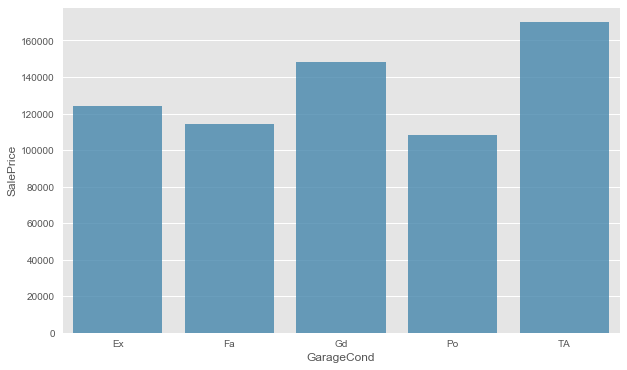

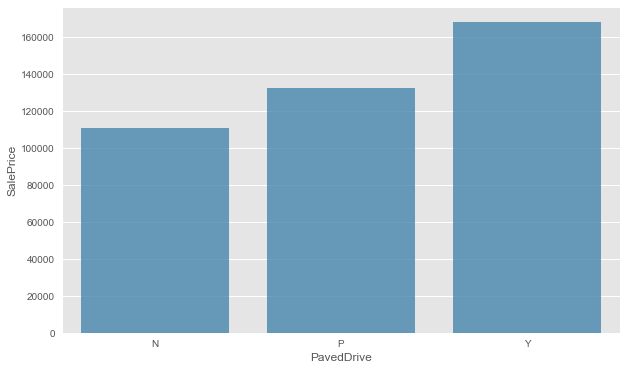

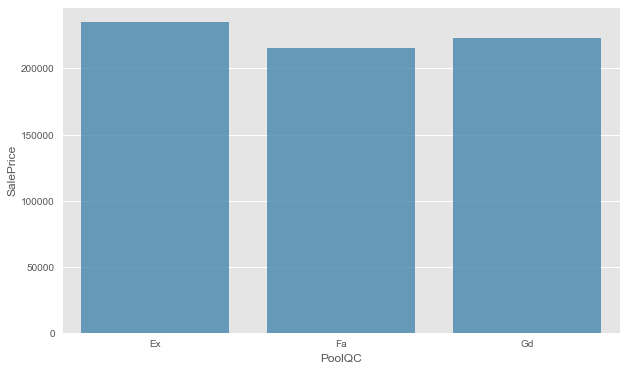

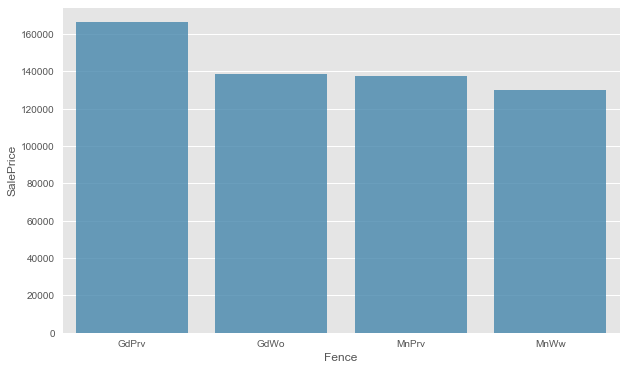

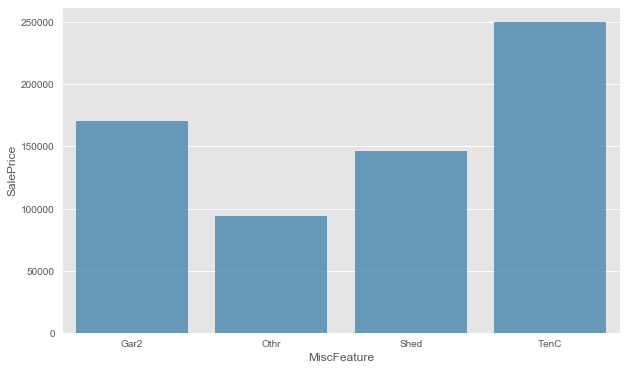

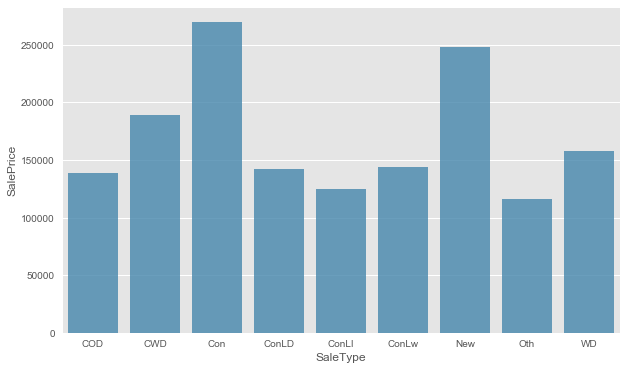

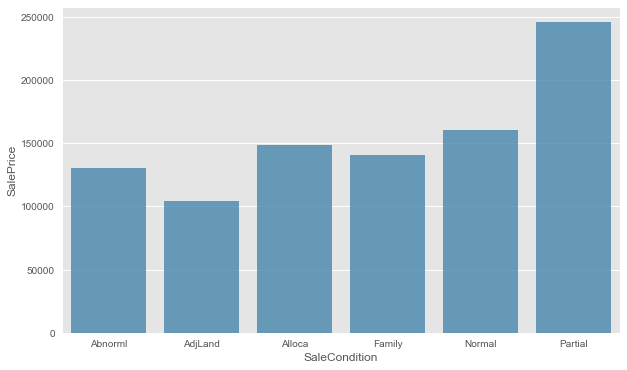

In [48]:
#Have a look at the non numeric feature mean sale price by class  
train_for_feature_engineering = pd.read_csv("./train.csv")
train_for_feature_engineering["LogSalePrice"] = np.log1p(train_for_feature_engineering["SalePrice"])

non_numeric_feature = train_for_feature_engineering.select_dtypes(exclude=[np.number])

for col in non_numeric_feature.columns:
    bar_plot(col)

Transform non numeric features into SalePrice numeric linear features thanks to the graphs just above

In [49]:
 #Process LandContour
def encode_lancontour(x):
    if x == "Bnk" :
        return 1
    elif x=="Lvl" :
        return 2
    elif x=="Low" :
        return 3
    return 4
    
combine["LandContourEncoded"] = combine["LandContour"].apply(encode_lancontour)



<font size=3.5> <strong>Transform features thanks to the Quality ladder</strong></font>

In [50]:

#Ex	Excellent - Exceptional Masonry Fireplace
#Gd	Good - Masonry Fireplace in main level
#TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
#Fa	Fair - Prefabricated Fireplace in basement
#Po	Poor - Ben Franklin Stove
#NA	No Fireplace

map_quality ={"NA":0, "Po":1,"Fa":2,"TA":3,"Gd":4,"Ex":5} 

combine["FireplaceQuEncoded"] =  combine["FireplaceQu"].map(map_quality)
combine["GarageQualEncoded"] =  combine["GarageQual"].map(map_quality)
combine["GarageCondEncoded"] =  combine["GarageCond"].map(map_quality)
combine["ExterQualEncoded"] =  combine["ExterQual"].map(map_quality)
combine["ExterCondEncoded"] =  combine["ExterCond"].map(map_quality)
combine["BsmtQualEncoded"] =  combine["BsmtQual"].map(map_quality)
combine["BsmtCondEncoded"] =  combine["BsmtCond"].map(map_quality)
combine["HeatingQCEncoded"] =  combine["HeatingQC"].map(map_quality)
combine["KitchenQualEncoded"] =  combine["KitchenQual"].map(map_quality)

combine["GarageGlobalValue"] = combine["GarageQualEncoded"] + combine["GarageCondEncoded"]
combine["ExterGlobalValue"] = combine["ExterQualEncoded"] + combine["ExterCondEncoded"]
combine["BsmtGlobalValue"] = combine["BsmtQualEncoded"] + combine["BsmtCondEncoded"]
combine["KitchenGlobalValue"] = combine["KitchenQualEncoded"] * combine["KitchenAbvGr"]


In [51]:
#Outdoor Open SurFace
#WoodDeckSF: Wood deck area in square feet
#OpenPorchSF: Open porch area in square feet
combine["OutdoorOpenSF"] = combine["WoodDeckSF"] + combine["OpenPorchSF"]

#Outdoor Closed SurFace
#EnclosedPorch: Enclosed porch area in square feet
#3SsnPorch: Three season porch area in square feet
#ScreenPorch: Screen porch area in square feet
combine["OutdoorClosedSF"] = combine["EnclosedPorch"] + combine["3SsnPorch"] + combine["ScreenPorch"]

#HasFireplace
combine["HasFireplace"]=0
combine.loc[combine["Fireplaces"]>0,"HasFireplace"]=1

#IsOneFlrHouse
combine["IsOneFlrHouse"]=0
combine.loc[ combine["GrLivArea"]==combine["1stFlrSF"]  , "IsOneFlrHouse"]=1

#Notice if there is a Basement
combine["HasBsmt"]=1
combine.loc[combine["TotalBsmtSF"]==0, "HasBsmt"]=0

#Extract month from MoSold on 2 digits
def set_month(month):
    if len(month)==1:
        return '0'+month
    else :
        return month
    
#Let's have a look at the house price along past years
#YearsDF = combine["YrSold"].astype(str)
#MonthDF = combine["MoSold"].astype(str).apply(set_month)
#combine["YMDf"] = YearsDF.str.cat(MonthDF)

#Count the number of sale for each period
#SaleByYMDf = combine.groupby("YMDf").size()
#combine["SaleByPeriod"] = combine["YMDf"].apply(lambda x : SaleByYMDf.get(x)) 

#Count the number of sale for each month
#SaleByMonth = combine.groupby("MoSold").size()
#combine["SaleByMonth"] = combine["MoSold"].apply(lambda x : SaleByMonth.get(x)) 


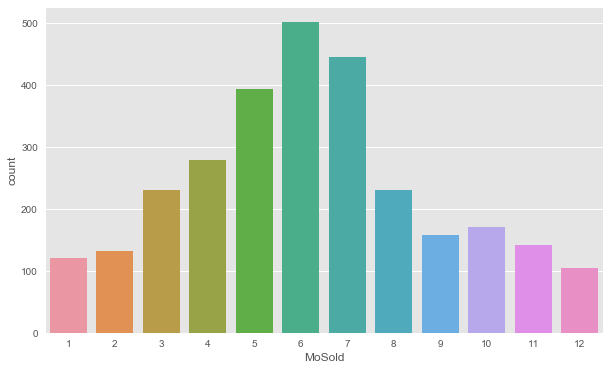

In [52]:
#Look at the hot selling House season
sns.countplot(combine["MoSold"])
map_season = {12:0, 1:0, 2:0, 3:1, 4:1, 5:2, 6:2, 7:2, 8:1, 9:0, 10:0, 11:0}
combine["HotSeasonSold"] = combine["MoSold"].map(map_season).astype(int)

In [53]:
#Get the Neighborhood Sale Price description
train_for_feature_engineering["SalePrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [54]:
#Then list median values for each Neighborhood 
train_for_feature_engineering.groupby("Neighborhood")["SalePrice"].median().sort_values()


Neighborhood
MeadowV     88000
IDOTRR     103000
BrDale     106000
OldTown    119000
Edwards    121750
BrkSide    124300
Sawyer     135000
Blueste    137500
SWISU      139500
NAmes      140000
NPkVill    146000
Mitchel    153500
SawyerW    179900
Gilbert    181000
NWAmes     182900
Blmngtn    191000
CollgCr    197200
ClearCr    200250
Crawfor    200624
Veenker    218000
Somerst    225500
Timber     228475
StoneBr    278000
NoRidge    301500
NridgHt    315000
Name: SalePrice, dtype: int64

In [55]:
#Define the map of house price classified by neighborhood thanks to the 2 last commands
map_neighborhood = {'MeadowV':0,     #88000

'IDOTRR':1,#     103000
'BrDale':1,#     106000
'OldTown':1,#    119000
'Edwards':1,#    121750
'BrkSide':1,#    124300

#25%      129975.000000
                    
'Sawyer':2,#     135000
'Blueste':2,#    137500
'SWISU':2,#      139500
'NAmes':2,#      140000
'NPkVill':2,#    146000
'Mitchel':2,#    153500

#50%      163000.000000                   
                    
'SawyerW':3,#    179900
'Gilbert':3,#    181000
'NWAmes':3,#     182900
'Blmngtn':3,#    191000
'CollgCr':3,#    197200
'ClearCr':3,#    200250
'Crawfor':3,#    200624

#75%      214000.000000                    

'Veenker':4,#    218000
'Somerst':4,#   225500
'Timber':4,#     228475
'StoneBr':4,#    278000
'NoRidge':4,#    301500
'NridgHt':4 }#     315000

combine["NeighborhoodLadder"]=combine["Neighborhood"].map(map_neighborhood)


In [56]:
#Evaluate the Neighborhood price by Feet
#Price by Feet
train_for_feature_engineering["PriceByF"]=train_for_feature_engineering["SalePrice"]/train_for_feature_engineering["GrLivArea"]

#Adapt Price by Feet for each Neighborhood
PriceByFByNeigh = train_for_feature_engineering.groupby("Neighborhood")["PriceByF"].median().sort_values()
combine["PriceByFByNeigh"] = combine["Neighborhood"].map(PriceByFByNeigh)

In [57]:
# Instead of taking the total Ground Living Area we take only the Good state one removing the Low Quality one.
combine["GdGrLivArea"] = combine["GrLivArea"]-combine["LowQualFinSF"]

In [58]:
#Define mapping for Garage Type
GarageType_map = {
    "NA":0,
    "CarPort":1,
    "Detchd":1,
    "Basment":2,
    "2Types":2,
    "Attchd":3,
    "BuiltIn":4
}

#apply the mapping just defined
combine["GarageTypeLadder"] = combine["GarageType"].map(GarageType_map)
combine[["GarageTypeLadder", "GdGrLivArea"]].isnull().sum()

GarageTypeLadder    0
GdGrLivArea         0
dtype: int64

In [59]:
# Hypothese : gather all bathroom data for a concentrated feature
# Add all bathrooms above and under ground together 
###################################################
#BsmtFullBath: Basement full bathrooms
#BsmtHalfBath: Basement half bathrooms
#FullBath: Full bathrooms above grade
#HalfBath: Half baths above grade

combine["TotalBathNb"] = combine["BsmtFullBath"] + 0.5*combine["BsmtHalfBath"] + combine["FullBath"] + 0.5*combine["HalfBath"]
combine["BedroomByBath"] = feature_fraction("BedroomAbvGr","TotalBathNb")

In [60]:
#Hypothese : The Sale Price is not directly correlated to the Year but to the Age at the House Sale year
combine["AgeAtSold"] = combine["YrSold"]-combine["YearBuilt"]


## Clean useless columns

In [61]:
#Id has to be used for the submission
Id_column = test['Id']
combine.drop('Id', axis = 1)




1stFlrSF  2ndFlrSF  3SsnPorch  BedroomAbvGr BldgType BsmtCond  \
0          856       854          0             3     1Fam       TA   
1         1262         0          0             3     1Fam       TA   
2          920       866          0             3     1Fam       TA   
3          961       756          0             3     1Fam       Gd   
4         1145      1053          0             4     1Fam       TA   
5          796       566        320             1     1Fam       TA   
6         1694         0          0             3     1Fam       TA   
7         1107       983          0             3     1Fam       TA   
8         1022       752          0             2     1Fam       TA   
9         1077         0          0             2   2fmCon       TA   
10        1040         0          0             3     1Fam       TA   
11        1182      1142          0             4     1Fam       TA   
12         912         0          0             2     1Fam       TA   
13        1494         0          0             3     1Fam       TA   
14        1253         0          0             2     1Fam       TA   
15         854         0          0             2     1Fam       TA   
16        1004         0          0             2     1Fam       TA   
17        1296         0          0             2   Duplex       NA   
18        1114         0          0             3     1Fam       TA   
19        1339         0          0             3     1Fam       TA   
20        1158      1218          0             4     1Fam       TA   
21        1108         0          0             3     1Fam       TA   
22        1795         0          0             3     1Fam       TA   
23        1060         0          0             3   TwnhsE       TA   
24        1060         0          0             3     1Fam       TA   
25        1600         0          0             3     1Fam       TA   
26         900         0          0             3     1Fam       TA   
27        1704         0          0             3     1Fam       TA   
28        1600         0          0             2     1Fam       TA   
29         520         0          0             1     1Fam       TA   
...        ...       ...        ...           ...      ...      ...   
1429       641         0          0             2     1Fam       TA   
1430       967       671          0             4     1Fam       TA   
1431       729         0          0             2     1Fam       NA   
1432      1060       336          0             4   2fmCon       TA   
1433       576       360          0             2     1Fam       Fa   
1434      1778         0          0             2   TwnhsE       TA   
1435      1646         0          0             2   TwnhsE       TA   
1436      1625         0          0             3     1Fam       TA   
1437      1664         0          0             4   Duplex       TA   
1438      1491         0          0             3     1Fam       TA   
1439      1210         0          0             3     1Fam       TA   
1440      1650         0          0             2     1Fam       TA   
1441      1403         0          0             2     1Fam       TA   
1442      1960         0          0             3     1Fam       Gd   
1443      1838         0          0             3     1Fam       TA   
1444      1600         0          0             3     1Fam       NA   
1445      1368         0          0             2   Duplex       TA   
1446       616       688          0             3   TwnhsE       TA   
1447       874         0          0             3     1Fam       TA   
1448      1652         0          0             4   Duplex       TA   
1449       630         0          0             1    Twnhs       TA   
1450       546       546          0             3   TwnhsE       TA   
1451      1360         0          0             3     1Fam       TA   
1452       546       546          0             3    Twnhs       TA   
1453       546       546      

## <p id="chapV">V - Post process the features</p>

------------------------------

------------------------------

<font size=3.5><strong>Log the skewed feature before training the model</strong></font>

In [62]:
from scipy.stats import skew

#Only for numeric features
final_numeric_features = combine.dtypes[combine.dtypes != "object"].index

#Get the skewed value 
skewed = combine[final_numeric_features].apply(lambda x: skew(x.dropna().astype(float)))
skewed = skewed[np.absolute(skewed) > 0.70]
skewed = skewed.index

#Log the skewed feature
combine[skewed] = np.log1p(combine[skewed])

In [63]:
combine[final_numeric_features].apply(lambda x: skew(x.dropna().astype(float)))
skewed

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtHalfBath', 'BsmtUnfSF', 'EnclosedPorch', 'Fireplaces', 'GrLivArea',
       'KitchenAbvGr', 'LotArea', 'LotFrontage', 'LowQualFinSF', 'MSSubClass',
       'MasVnrArea', 'MiscVal', 'NullCol', 'OpenPorchSF', 'PoolArea',
       'ScreenPorch', 'TotRmsAbvGrd', 'WoodDeckSF', 'HasLotFrontage',
       'HasAlley', 'HasPool', 'HasFence', 'HasMiscFeature',
       'GrLivAreaByLotArea', 'GarageYrBuiltByYrBuilt', 'YearRemodAddByYrBuilt',
       'GarageCarsByGarageArea', 'LotFrontageBy1stFlrArea',
       'GrLivAreaByNeighMedian', 'LotAreaByNeighMedian', 'LandContourEncoded',
       'GarageQualEncoded', 'GarageCondEncoded', 'ExterQualEncoded',
       'ExterCondEncoded', 'BsmtQualEncoded', 'BsmtCondEncoded',
       'GarageGlobalValue', 'BsmtGlobalValue', 'KitchenGlobalValue',
       'OutdoorOpenSF', 'OutdoorClosedSF', 'HasBsmt', 'GdGrLivArea',
       'BedroomByBath'],
      dtype='object')

In [64]:
#Last check to ensure we have no more null values
for col in combine.columns:
    print(col +  "  " + str(combine[col].isnull().sum()))

1stFlrSF  0
2ndFlrSF  0
3SsnPorch  0
BedroomAbvGr  0
BldgType  0
BsmtCond  0
BsmtExposure  0
BsmtFinSF1  0
BsmtFinSF2  0
BsmtFinType1  0
BsmtFinType2  0
BsmtFullBath  0
BsmtHalfBath  0
BsmtQual  0
BsmtUnfSF  0
CentralAir  0
Condition1  0
Condition2  0
Electrical  0
EnclosedPorch  0
ExterCond  0
ExterQual  0
Exterior1st  0
Exterior2nd  0
FireplaceQu  0
Fireplaces  0
Foundation  0
FullBath  0
Functional  0
GarageArea  0
GarageCars  0
GarageCond  0
GarageFinish  0
GarageQual  0
GarageType  0
GarageYrBlt  0
GrLivArea  0
HalfBath  0
Heating  0
HeatingQC  0
HouseStyle  0
Id  0
KitchenAbvGr  0
KitchenQual  0
LandContour  0
LandSlope  0
LotArea  0
LotConfig  0
LotFrontage  0
LotShape  0
LowQualFinSF  0
MSSubClass  0
MSZoning  0
MasVnrArea  0
MasVnrType  0
MiscVal  0
MoSold  0
Neighborhood  0
NullCol  0
OpenPorchSF  0
OverallCond  0
OverallQual  0
PavedDrive  0
PoolArea  0
RoofMatl  0
RoofStyle  0
SaleCondition  0
SaleType  0
ScreenPorch  0
Street  0
TotRmsAbvGrd  0
TotalBsmtSF  0
Utilities  0


<font size=3.5> <strong>Scale features</strong></font>

In [65]:
# As we will use regression models we have to scale features 
# to avoid inequal feature weight due to different ladder of values during learning.
from sklearn.preprocessing import StandardScaler

############################
# 1) scale numeric features
numeric_features = combine.select_dtypes(include=[np.number])
scaler = StandardScaler()
scaled_numeric = pd.DataFrame(scaler.fit_transform(numeric_features), index=numeric_features.index, columns=numeric_features.columns)


###############################
# 2) Scale non numeric features    
#get dummies on non numeric features
def dummies(df, columns = None):
    if columns is not None:
        for column in columns:
            df = pd.concat((df, pd.get_dummies(df[column], prefix = column)), axis = 1)
            del df[column]
    return df
 
combine_non_numeric = combine.select_dtypes(exclude=[np.number])

#get the hot encoded categorical columns into "combine_scaled_non_numeric"
combine_dummies = dummies(combine_non_numeric, columns= combine_non_numeric.columns)

#################################################
# 3) Merge numeric and non numeric scaled columns 
#Concat the scaled and the dummies columns to feed the model
combine_scaled = pd.concat((scaled_numeric, combine_dummies),  axis = 1)


combine_scaled.columns

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF',
       'EnclosedPorch',
       ...
       'SaleType_ConLD', 'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New',
       'SaleType_Oth', 'SaleType_WD', 'Street_Grvl', 'Street_Pave',
       'Utilities_AllPub', 'Utilities_NoSeWa'],
      dtype='object', length=332)

In [66]:
#del useless combine_scaled columns to fit models
def drop_columns(df, columns=None):
    for col in columns:
        del df[col]
    return 


In [67]:
#Split combine to get back train and test datasets
def split_df( df_combined,limit ):    
    train = df_combined[:limit]
    test = df_combined[limit:]
    
    return train, test
target_log = train["LogSalePrice"]
train,test = split_df(combine_scaled,train_shape0)

In [68]:
#Add the logged sale price to the train dataset
train_corr = pd.concat( [ train, target_log ], axis=1  )

#Get the Logged Sale Price correlation now
train_log_correlations = train_corr.corr()
print(train_log_correlations["LogSalePrice"].sort_values()[:10])
train_log_correlations["LogSalePrice"].sort_values()[-45:]

ExterQual_TA                  -0.603473
AgeAtSold                     -0.599371
TotRmsAbvGrdByGrLivArea       -0.576157
KitchenQual_TA                -0.542445
FireplaceQu_NA                -0.512008
TotalPiecesAbvGrByGrLivArea   -0.494751
BsmtQual_TA                   -0.483720
BedroomByBath                 -0.449539
GarageFinish_Unf              -0.442332
GarageType_Detchd             -0.396988
Name: LogSalePrice, dtype: float64


LotFrontage               0.370060
BsmtGlobalValue           0.384409
KitchenQual_Ex            0.395693
LotArea                   0.401528
GrLivAreaByNeighMedian    0.414907
GarageFinish_Fin          0.420147
GarageType_Attchd         0.421227
MasVnrArea                0.426516
KitchenQual_Gd            0.428090
BsmtFinType1_GLQ          0.439846
KitchenGlobalValue        0.444963
OutdoorOpenSF             0.455189
BsmtQual_Ex               0.458295
HeatingQC_Ex              0.466451
OpenPorchSF               0.467117
HeatingQCEncoded          0.472905
BsmtQualEncoded           0.502076
Fireplaces                0.506332
HasFireplace              0.512008
ExterQual_Gd              0.524578
TotRmsAbvGrd              0.532941
Foundation_PConc          0.536087
FireplaceQuEncoded        0.548291
GarageYrBlt               0.563327
YearRemodAdd              0.570806
GarageTypeLadder          0.585713
FullBath                  0.590228
YearBuilt                 0.598799
ExterGlobalValue    

## <p id="chapVI">VI - Build Model</p>

---------------------------

---------------------------

<font size=3.5><strong>Split the train dataset to evaluate the Root Mean Squared Error</strong></font> 

In [69]:
from sklearn.model_selection import train_test_split
#Split combine back to train and test datasets
X_train, X_test, y_train, y_test = train_test_split(
                                    train, target_log, random_state=48, test_size=.33)

X_train_selected, X_test_selected, y_train_selected, y_test_selected = train_test_split(
                                    train, target_log, random_state=48, test_size=.33)


In [70]:
#Import model libraries
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor
import xgboost as xgb 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.cross_validation import KFold
import datetime
from time import gmtime, strftime
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LassoLars

#Use a GridSearch with 3 folders to tune hyper parameter of the model  
def fit_and_predict(model, param_grid):
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='mean_squared_error', cv=3, n_jobs=-1)
    grid_search.fit(train, target_log)
    return grid_search

#Scatter the predicted values 
def show_predictions(predictions,target):
    plt.scatter(predictions, target, alpha=.75, color='b')
    plt.xlabel('Predicted Price')
    plt.ylabel('Actual Price')
    plt.show()

C:\Users\Ludovic\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [73]:
#Let's try a first model
#The more intuitive one is Ridge : regression model with regularization
def tune_hyperparameters(in_model, in_param_grid,x_train,y_train):
    model = in_model
    param_grid= in_param_grid
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='mean_squared_error', 
                               cv=3, n_jobs=-1)
    grid_search.fit(x_train, y_train)
    
    ##### Inspect best parameters
    print(str(np.sqrt(-grid_search.best_score_)))
    print(grid_search.best_params_)
    return grid_search

#Define hyperparameters values and tune them    
print(strftime("%Y-%m-%d %H:%M:%S", gmtime()))
param_grid = { "alpha"   : [0.001, 0.01, 0.1, 10, 15,20],

              "solver" : ["lsqr"]
             }
tune_hyperparameters(Ridge(), param_grid, train, target_log)

print(strftime("%Y-%m-%d %H:%M:%S", gmtime()))


2017-07-10 22:24:02
0.106744900146
{'alpha': 20, 'solver': 'lsqr'}
2017-07-10 22:24:30


RMSE is: 
 0.105481775417


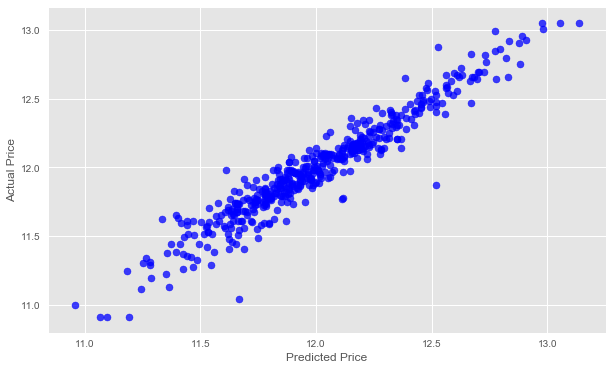

In [74]:
#Define a simple cross validation function 
def cross_validate_Xtrain(in_model,in_x_train,in_y_train,in_x_test,in_y_test ):
    in_model.fit(in_x_train, in_y_train)
    predictions = in_model.predict(in_x_test)

    #RMSE is the rooted mean squared error score used in this Kaggle competition to evaluate the model performance
    print ('RMSE is: \n', np.sqrt(mean_squared_error(in_y_test, predictions)))
    
    #Look at the difference between in_x_test predictions and in_y_test
    show_predictions(predictions,in_y_test)
    
    #return the score and predictions 
    return np.sqrt(mean_squared_error(in_y_test, predictions)), predictions

rg=Ridge(alpha=20, solver= "lsqr", random_state=8)
l_score,l_predictions = cross_validate_Xtrain(rg, X_train, y_train, X_test, y_test)


In [77]:
diff = np.absolute(y_test-l_predictions)
diff.sort_values(ascending=False)


588     0.646725
462     0.627264
488     0.374225
1181    0.354568
666     0.346478
714     0.337373
1122    0.293878
1062    0.281153
968     0.276061
218     0.262801
658     0.262199
662     0.260212
107     0.258297
1143    0.256415
48      0.233652
942     0.229650
1279    0.229335
789     0.227094
473     0.220740
17      0.217745
559     0.213344
535     0.210749
1131    0.207984
380     0.201438
318     0.200454
38      0.195961
198     0.194242
546     0.193452
1216    0.190255
242     0.188886
          ...   
849     0.005982
1210    0.005744
1023    0.005709
765     0.005593
164     0.005470
541     0.005192
1201    0.005049
794     0.004940
656     0.004563
1232    0.004067
1402    0.004011
701     0.003978
134     0.003495
673     0.003044
1046    0.002759
14      0.002548
229     0.002476
1018    0.002316
1009    0.002213
572     0.002143
602     0.002068
276     0.001874
1297    0.001757
652     0.001744
837     0.000688
1351    0.000647
605     0.000604
564     0.0004

## <p id="chapVII">VII - Select best features</p>

---------------------------

---------------------------

<font size=3.5> <strong>Find out the best features for the Ridge Model</strong></font><br>
Now that we have a score to refer to we will try to select the best features to obtain the best score 

In [91]:
from sklearn.linear_model import (LinearRegression, Ridge, 
                                  Lasso, RandomizedLasso)
from sklearn.feature_selection import RFE, f_regression
from sklearn.preprocessing import MinMaxScaler

ranks = {}
names=train.columns

#Function to rank features for a specific model
def rank_to_dict(ranks, names, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
    ranks = map(lambda x: round(x, 2), ranks)
    return dict(zip(names, ranks ))


ridge_model = Ridge(alpha=20)
ridge_model.fit(train, target_log)
ranks["Ridge"] = rank_to_dict(np.abs(ridge_model.coef_), names)
 
 
lasso_model = Lasso(alpha=.05)
lasso_model.fit(train, target_log)
ranks["Lasso"] = rank_to_dict(np.abs(lasso_model.coef_), names)
 
 
rlasso_model = RandomizedLasso(alpha=0.04)
rlasso_model.fit(train, target_log)
ranks["Stability"] = rank_to_dict(np.abs(rlasso_model.scores_), names)
 
#stop the search when 5 features are left (they will get equal scores)
#rfe = RFE(lr, n_features_to_select=5)
#rfe.fit(X,Y)
#ranks["RFE"] = rank_to_dict(map(float, rfe.ranking_), names, order=-1)
 
df_ranks = pd.DataFrame.from_dict(ranks)
df_ranks["mean"] = df_ranks.mean(1)
df_ranks = df_ranks.sort_values("mean",ascending=False)
feature_list = df_ranks.index.tolist()

Once we have ordered the feature by interest, we will filter them thanks to the Ridge model.

2017-07-10 22:51:21
2017-07-10 22:51:22


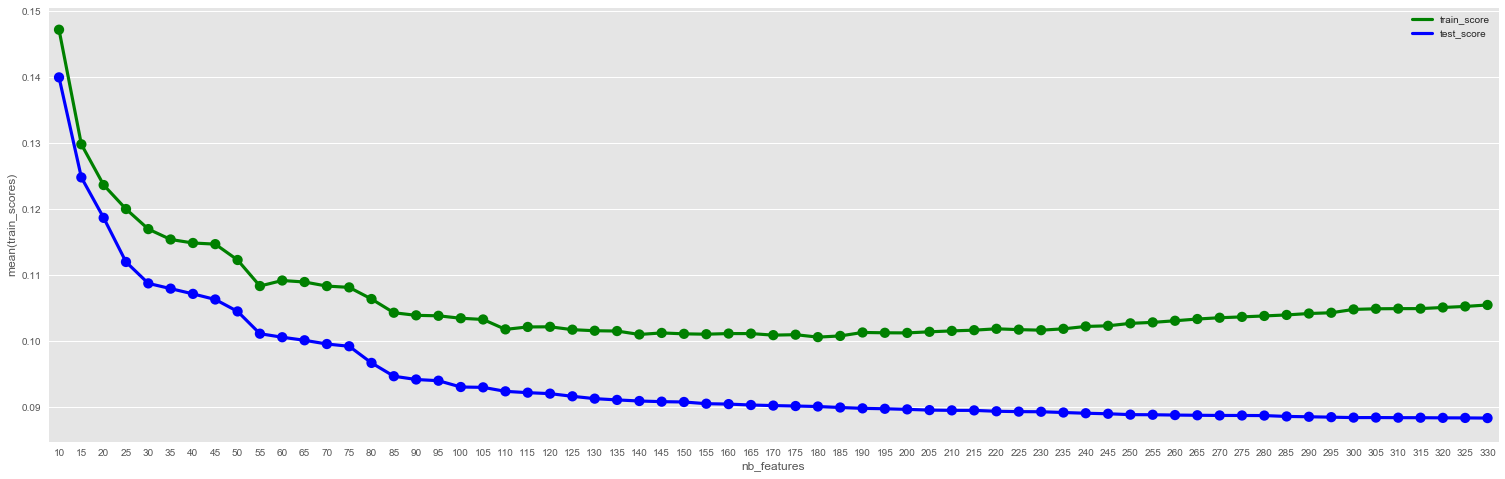

2017-07-10 22:51:23


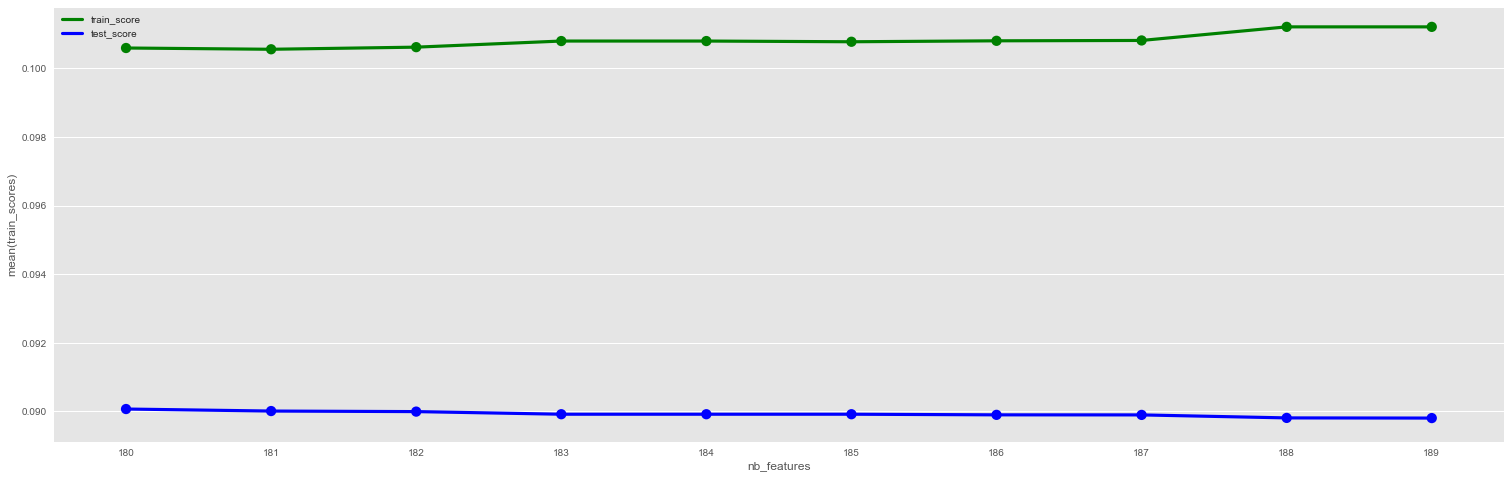

181


In [93]:
print(strftime("%Y-%m-%d %H:%M:%S", gmtime()))
#col_list=train.columns

#Sort the correlation LogSalePrice list with absolute values in descending order to select the best features first 
#corr_df = np.absolute(train_log_correlations["LogSalePrice"]).sort_values(ascending=False).reset_index()


#Search best features
#input : min and max number of features 
#      : the model
#      : the ordered list of features 
def search_best_features(min_nb_features,max_nb_features,step,model,feature_list):
    nb_features=[]
    rmse_score=[]
    std_values=[]
    train_scores=[]

    #loop on the feature list adding "step" feature(s) each turn and fit and predict on this train feature list 
    for i in range(min_nb_features,max_nb_features,step):
    
        #define your column list
        col_selected = feature_list[0:i]
        
        #fit and predict the model
        #rg = Ridge(alpha=10, solver= "lsqr", random_state=8 )
        #rg.fit(X_train[col_selected], y_train)
        model.fit(X_train[col_selected], y_train)
        train_predictions = model.predict(X_train[col_selected])
        predictions = model.predict(X_test[col_selected])
        
        #add the number of features and the score obtained in the two lists associated
        nb_features.append(i)
        train_scores.append((np.sqrt(mean_squared_error(y_train, train_predictions))))
        std_values.append(predictions.std())
        rmse_score.append((np.sqrt(mean_squared_error(y_test, predictions))))
    print(strftime("%Y-%m-%d %H:%M:%S", gmtime()))
    
    #Build a dataframe to display the score evolution adding features as input to the model
    rdg_score = pd.DataFrame()
    rdg_score['nb_features'] = nb_features
    rdg_score['scores'] = rmse_score
    rdg_score['std'] = std_values
    rdg_score['train_scores'] = train_scores
    
    #Display the scores graph
    fig, ax = plt.subplots(figsize=(26,8))    
    sns.pointplot(x="nb_features", y="scores", data=rdg_score, color='green')
    sns.pointplot(x="nb_features", y="train_scores", data=rdg_score, color='blue')
    ax.legend(handles=ax.lines[::len(rdg_score)+1], labels=["train_score","test_score"])
    plt.show()
    
    #Return the best number of features 
    l_best_features_nb = rdg_score.loc[rdg_score['scores'].idxmin(),"nb_features"].astype(int)
    return l_best_features_nb 

## First we search the area of the better feature list and then we will focus on this area to get the exact best number
#launch the best features on the whole column list with a step of 5 features
rg = Ridge(alpha=20, solver= "lsqr", random_state=8 )
step_to_search = 5
around_best_features_nb =search_best_features(10,len(feature_list),step_to_search, rg, feature_list)

#around_best_features_nb value is around 190 but it overfits so we decide to set around_best_features_nb to 50
around_best_features_nb = 185

#Look around the best feature number to evaluate it exactly
min_area = around_best_features_nb-step_to_search
max_area = around_best_features_nb+step_to_search

#Now search the exact best features numbers
best_features_nb = search_best_features(min_area,max_area,1, rg, feature_list)
print(best_features_nb)

best_features_list = feature_list[:best_features_nb+1] 


We will keep 181 as the best features to train and predict.

In [94]:
best_features_list = feature_list[:181] 

best_features_list_rg = feature_list[:181] 


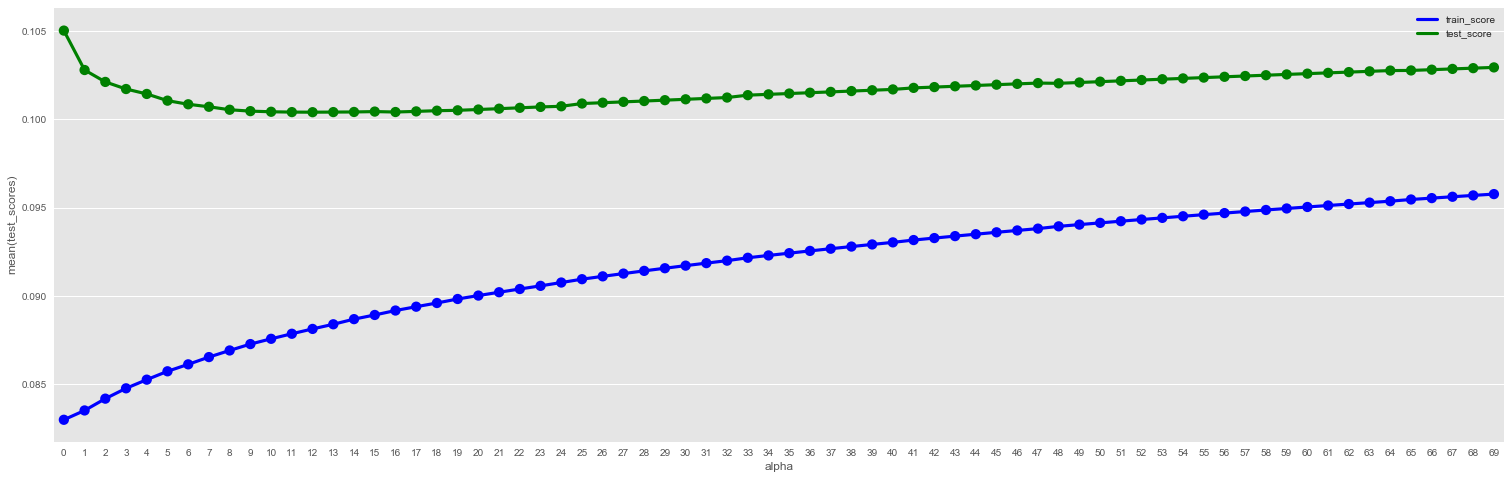

 Min Test scores is obtained for alpha : 12


In [95]:
##CHANGE 1 - parameter and reduce overfitting thanks to Alpha
#Define a simple cross validation function 
def cross_validate_Xtrain(in_model,in_x_train,in_y_train,in_x_test,in_y_test ):
    in_model.fit(in_x_train, in_y_train)
    train_predictions = in_model.predict(in_x_train)
    test_predictions = in_model.predict(in_x_test)

    #return the score and predictions 
    return np.sqrt(mean_squared_error(in_y_train, train_predictions)), np.sqrt(mean_squared_error(in_y_test, test_predictions)) 

train_scores = []
test_scores = []
alpha_steps = np.arange(0,70,1)
for cur_alpha in alpha_steps:
    rg=Ridge(alpha=cur_alpha, solver= "lsqr", fit_intercept=True, random_state=8)
    l_train_score,l_test_score = cross_validate_Xtrain(rg, X_train[best_features_list], y_train, X_test[best_features_list], y_test)
    train_scores.append(l_train_score)
    test_scores.append(l_test_score)
    #print(" Alpha : "+str(cur_alpha) + "  train_rmse : "+ str(l_train_score)+" test_rmse : "+str(l_test_score))

df_scores = pd.DataFrame()    
df_scores["train_scores"]=train_scores
df_scores["test_scores"]=test_scores
df_scores["alpha"]=alpha_steps

fig, ax = plt.subplots(figsize=(26,8))    
sns.pointplot(x="alpha", y="train_scores", data=df_scores,  color='blue', label="train scores", ax=ax)
sns.pointplot(x="alpha", y="test_scores", data=df_scores, color='green', label="test scores", ax=ax)    
ax.legend(handles=ax.lines[::len(df_scores)+1], labels=["train_score","test_score"])
plt.show()
print(" Min Test scores is obtained for alpha : " + str(df_scores["test_scores"].idxmin()))


## <p id="chapVIII">VIII - Set models hyperparameters</p>

---------------------------

---------------------------

We will now use the XGBoost model that is the short name for the "Extreme <a href="https://en.wikipedia.org/wiki/Gradient_boosting">Gradient Boosting</a> tree" model introduce by Friedman in 2001.<br>
You can download <a href="http://www.picnet.com.au/blogs/guido/post/2016/09/22/xgboost-windows-x64-binaries-for-download/">here</a> and install as explained on this web page.
<font size = 3.5> <strong> XGBoostRegressor parameters</strong></font>

In [110]:
#XGBoost parameters list
xgb_params = {
    "colsample_bytree"   : 0.2, 
    "gamma" : 0,
    "learning_rate" : 0.01,
    "max_depth":3, 
    "reg_alpha":0.8,
    "reg_lambda": 0.6,
    "subsample": 0.2,
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'min_child_weight':3, #1.5 
    'silent': 1,
    'seed':42
}

#Data Matrix is an internal data structure used by XGBoost and optimized for both memory efficiency and training speed
xgtrain = xgb.DMatrix(X_train, y_train, feature_names=X_train.columns)
xgtest = xgb.DMatrix(X_test, y_test, feature_names=X_test.columns)
watchlist = [ (xgtrain,'train'), (xgtest, 'test') ]

#Increase the number of rounds while running in local
num_rounds = 30000 

#Loop on till you reach minimal value for the xgtest
xgb_model = xgb.train(xgb_params, xgtrain, num_rounds, watchlist, early_stopping_rounds=3000, verbose_eval=200)



[0]	train-rmse:11.4228	test-rmse:11.3882
Multiple eval metrics have been passed: 'test-rmse' will be used for early stopping.

Will train until test-rmse hasn't improved in 3000 rounds.
[200]	train-rmse:1.5744	test-rmse:1.54567
[400]	train-rmse:0.276103	test-rmse:0.267375
[600]	train-rmse:0.127518	test-rmse:0.135882
[800]	train-rmse:0.107461	test-rmse:0.121215
[1000]	train-rmse:0.100432	test-rmse:0.116975
[1200]	train-rmse:0.096121	test-rmse:0.114573
[1400]	train-rmse:0.093153	test-rmse:0.112828
[1600]	train-rmse:0.090497	test-rmse:0.111396
[1800]	train-rmse:0.088332	test-rmse:0.110452
[2000]	train-rmse:0.08648	test-rmse:0.109812
[2200]	train-rmse:0.084806	test-rmse:0.109289
[2400]	train-rmse:0.083281	test-rmse:0.108992
[2600]	train-rmse:0.081815	test-rmse:0.108536
[2800]	train-rmse:0.080479	test-rmse:0.108199
[3000]	train-rmse:0.079237	test-rmse:0.107979
[3200]	train-rmse:0.078204	test-rmse:0.107686
[3400]	train-rmse:0.077048	test-rmse:0.107332
[3600]	train-rmse:0.075953	test-rmse:0.1

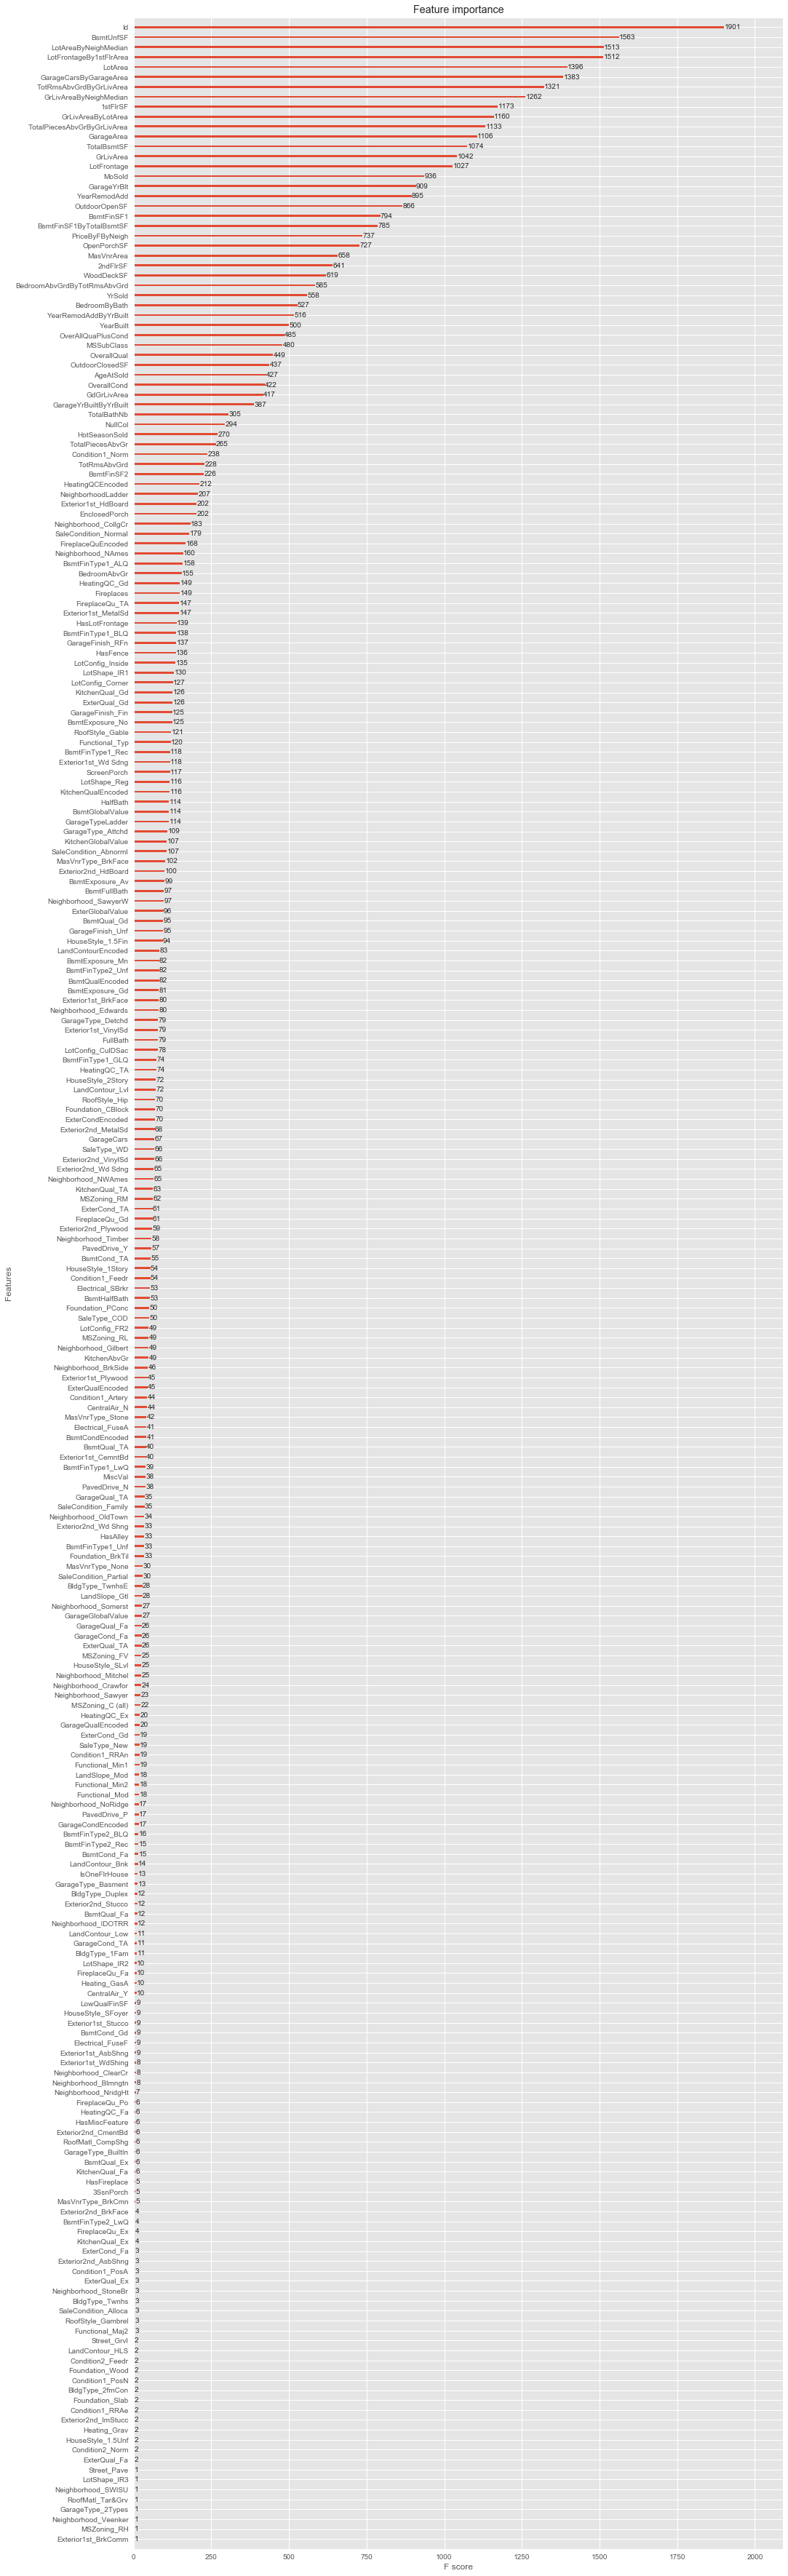

In [100]:
#Plot XGB feature importance
fig, ax = plt.subplots(figsize=(16, 64))
xgb.plot_importance(xgb_model, ax=ax)

import operator
importance = xgb_model.get_fscore()
importance = sorted(importance.items(), key=operator.itemgetter(1),reverse=True)
xgb_feature_list=[]
for i in range(0,len(importance)-1):
    xgb_feature_list.append(importance[i][0])
xgb_feature_list_df = pd.DataFrame(xgb_feature_list)


2017-07-04 20:57:47


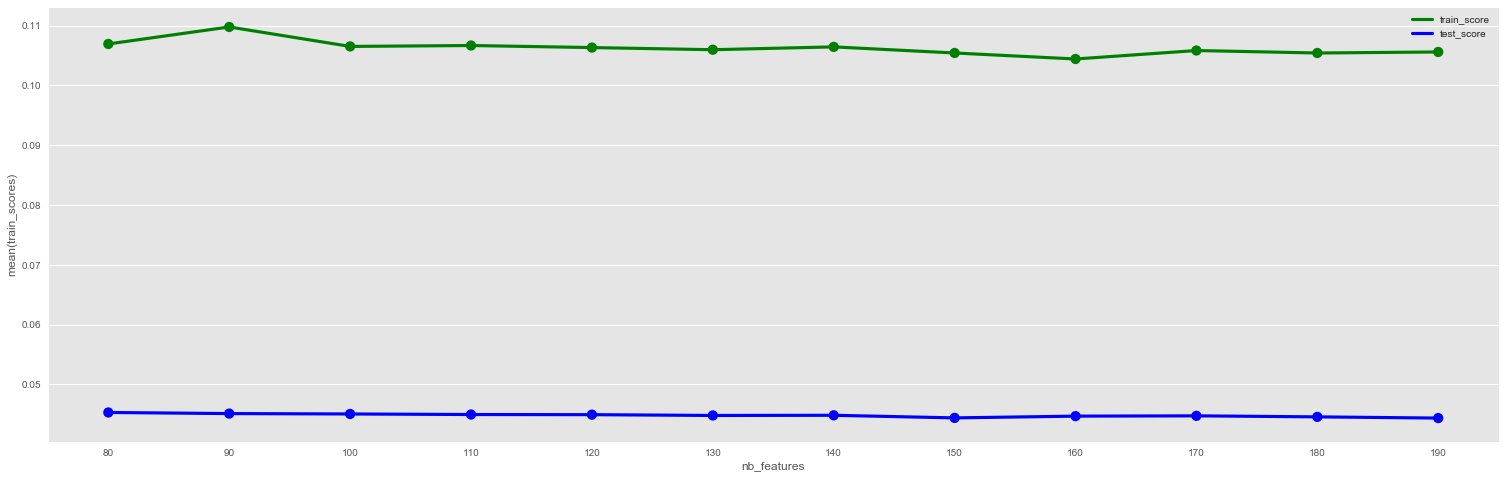

2017-07-04 20:57:48


160

In [115]:
import operator
importance = xgb_model.get_fscore()
importance = sorted(importance.items(), key=operator.itemgetter(1),reverse=True)

print(strftime("%Y-%m-%d %H:%M:%S", gmtime()))

#Sort the feature by importance
xgb_feature_list=[]
for i in range(0,len(importance)-1):
    xgb_feature_list.append(importance[i][0])

#Define our XGB model    
xgb_model = xgb.XGBRegressor(colsample_bytree=0.8, gamma = 0, learning_rate = 0.01, max_depth= 4,
                         min_child_weight=3, n_estimators=11363, reg_alpha=0.8, reg_lambda=1,subsample=0.2)

#Go through feature lists to evaluate the usefull feature group to keep avoiding to fit the noise 
step_to_search = 10
xgb_feature_list_df = pd.DataFrame(xgb_feature_list)
around_best_features_nb =search_best_features(80,200,step_to_search, xgb_model, xgb_feature_list_df)

print(strftime("%Y-%m-%d %H:%M:%S", gmtime()))
around_best_features_nb

In [79]:
best_features_list_xgb = xgb_feature_list[:160] 

<font size=3.5><strong>Evaluate best models and their parameters</strong></font>

In [106]:
pd.options.display.max_rows = 3000
#Create a class to gather used function and permit iterate on several models
class FeaturesAndParametersSelectioner:
    def __init__(self, models, params, correlated_feature_list, xgb_feature_list, in_train, in_target):
        
        #Check if all parameters have been recorded in params "parameter" for models "parameter"
        if not set(models.keys()).issubset(set(params.keys())):
            missing_params = list(set(models.keys()) - set(params.keys()))
            raise ValueError("Some estimators are missing parameters: %s" % missing_params)
        
        #Then init the class wit parameters
        self.models = models
        self.params = params
        self.keys = models.keys()
        
        #Create a dictionary for the grid searches
        self.grid_searches = {}
        
        #Feature list descent ordered by correlation importance 
        self.correlated_feature_list = correlated_feature_list
        self.xgb_feature_list = xgb_feature_list
        
        #Define how many features tune each model
        self.features_nb={}
        self.default_model = Ridge(alpha=10, solver= "lsqr", random_state=8 )
        
        #Here we get the train dataset and the target
        self.train = in_train
        self.target = in_target
        
        #Define the number of correlated feature we will retain to fit our models
        self.zoom = False
        self.best_feature_nb = 0
        self.best_features_list= []
        
    #Split the train dataset and let 33% of rows to test the model
    def  split_train(self):
        self.X_train_selected, self.X_test_selected, self.y_train_selected, self.y_test_selected = train_test_split(
                                    self.train, self.target, random_state=48, test_size=.33)
          
    #set best features for all model types
    #def set_best_features(self):
        #self.best_feature_nb = 186
        #self.best_features_list = self.correlated_feature_list[1:self.best_feature_nb]
        #self.best_features_list_xgb = xgb_feature_list[1:,0] 
        #self.best_features_list_rg = corr_df.iloc[1:186,0] 

    #Loop and fit the models
    def fit(self, cv=3, n_jobs=-1, scoring=None, refit=False):
        
        #Define train and target variables
        y = self.target
        for key in self.keys:
            
            #If Ridge use only the best correlated features 
            if key == 'Ridge':
                X = self.train.loc[:,self.correlated_feature_list]
                
            elif key == 'Lasso':
                X = self.train.loc[:,self.correlated_feature_list]
            
            elif key == 'ElasticNet':
                X = self.train.loc[:,self.correlated_feature_list]
                
            else :
                X = self.train.loc[:,self.xgb_feature_list]
            
        
            print(strftime("%Y-%m-%d %H:%M:%S", gmtime()))
            print("Running GridSearchCV for %s." % key)            
            model = self.models[key]
            params = self.params[key]
            gs = GridSearchCV(model, params, cv=cv, n_jobs=n_jobs, 
                               scoring=scoring, refit=refit)
            gs.fit(X,y)
            
            #Add elements into grid_searches attribute
            self.grid_searches[key] = gs    

    #Display the scores obtained by models according the "sort_by" order        
    def score_summary(self, sort_by='mean_score'):
        def row(key, scores, params):
            d = {
                 'estimator': key,
                 'min_score': min(scores),
                 'max_score': max(scores),
                 'mean_score': np.mean(scores),
                 'std_score': np.std(scores),
            }
            return pd.Series({**params,**d})
        
        #Build a dataframe that will record all model scores and parameters
        rows = [row(k, gsc.cv_validation_scores, gsc.parameters) 
                     for k in self.keys
                     for gsc in self.grid_searches[k].grid_scores_]
        df = pd.concat(rows, axis=1).T.sort([sort_by], ascending=False)
        
        columns = ['estimator', 'min_score', 'mean_score', 'max_score', 'std_score']
        columns = columns + [c for c in df.columns if c not in columns]

        return df[columns]
    


print(strftime("%Y-%m-%d %H:%M:%S", gmtime()))
#col_list=train.columns

#Sort the correlation LogSalePrice list with absolute values in descending order to select the best features first 
#corr_df = np.absolute(train_log_correlations["LogSalePrice"]).sort_values(ascending=False).reset_index()


#List models and parameters into 2 dictionaries
models1 = { 
    'RandomForestRegressor': RandomForestRegressor(random_state=42),
    'Ridge' : Ridge(random_state=42),
    'Lasso' : Lasso(),
    'XGBRegressor' : xgb.XGBRegressor(seed=42, silent=1),
    'GradientBoostingRegressor' : GradientBoostingRegressor( random_state=40 ),
    'ElasticNet': ElasticNet()
    }

params1 = { 
               
    'RandomForestRegressor': { "criterion"   : ["mse"],
               "n_estimators" : [400,800,1400],
               "max_depth" : [3, 4],
               "max_features" : [ "sqrt", "log2"] },
               
             
    'Ridge':{ "alpha"   : [12],
              "solver" : ["lsqr"] },
             
    'Lasso' : { "alpha"   : [0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 0.8],
               "max_iter" : [50, 100, 200, 400, 800, 2000, 5000, 10000]},
             
    'XGBRegressor' :           { 
              "colsample_bytree"   : [0.2, 0.8], 
               "gamma" : [0],     
              "learning_rate" : [0.01, 0.05, 0.1], 
              "max_depth":[3,5,7],
              "min_child_weight":[1.5, 3], 
              "n_estimators": [300, 1500, 3000, 7000, 10000],
                 "reg_alpha":[0.8], 
                 "reg_lambda":[0.6, 1],
                 "subsample":[0.2]
                 } ,
    
    'GradientBoostingRegressor':  { 'n_estimators' :[ 100, 400, 800, 1200, 1500, 2000] , 
               'max_features' : [ 20,  30, 40, 80] , 
               'max_depth' : [3, 4, 5, 6] ,
               'learning_rate' : [ 0.005, 0.01, 0.05, 0.1, 0.2] , 
                'subsample' : [0.2, 0.5, 0.8] }, 
    
    'ElasticNet': {'alpha':[0.0004, 0.005,0.1,0.5, 1], 'l1_ratio' : [0.1, 0.5, 0.8, 1]}

}

#Init the class to identify best features and params
selectionner1 = FeaturesAndParametersSelectioner(models1, params1, best_features_list_rg, xgb_feature_list_df.iloc[1:,0], train, target_log)

#Search the best features
#step_to_search = 5
#selectionner1.select_best_features(10,len(corr_df),5)

#Set best features thanks to the Ridge analyse above
#selectionner1.set_best_features()

#Loop on the models and their own params and keep the score obtained from their grid_search
selectionner1.fit(scoring='neg_mean_squared_error')

#Print the sorted score obtained 
selectionner1.score_summary(sort_by='mean_score')




2017-07-11 00:41:21
2017-07-11 00:41:21
Running GridSearchCV for RandomForestRegressor.
2017-07-11 00:41:53
Running GridSearchCV for Ridge.
2017-07-11 00:42:01
Running GridSearchCV for Lasso.
2017-07-11 00:42:13
Running GridSearchCV for XGBRegressor.
2017-07-11 06:13:27
Running GridSearchCV for GradientBoostingRegressor.
2017-07-11 06:57:16
Running GridSearchCV for ElasticNet.


C:\Users\Ludovic\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)
C:\Users\Ludovic\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)
C:\Users\Ludovic\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)
C:\Users\Ludovic\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:667: DeprecationWarning: T

estimator  min_score mean_score   max_score  \
12                        Ridge -0.0118981 -0.0103792 -0.00949267   
1568                 ElasticNet -0.0123127 -0.0106245 -0.00975619   
1567                 ElasticNet -0.0123291 -0.0106251  -0.0097377   
15                        Lasso -0.0122749 -0.0106494 -0.00981514   
16                        Lasso -0.0122958 -0.0106529 -0.00980218   
17                        Lasso -0.0123169 -0.0106598 -0.00980218   
20                        Lasso -0.0123213 -0.0106613 -0.00980218   
19                        Lasso -0.0123213 -0.0106613 -0.00980218   
18                        Lasso -0.0123213 -0.0106613 -0.00980218   
14                        Lasso -0.0123092  -0.010673 -0.00970671   
1566                 ElasticNet  -0.012437 -0.0107115 -0.00980708   
1569                 ElasticNet  -0.012304 -0.0107173 -0.00989282   
13                        Lasso -0.0125477 -0.0108745 -0.00987126   
22                        Lasso -0.0125035 -0.0109114  -0.0100309   
21                        Lasso -0.0124962 -0.0109417 -0.00999859   
23                        Lasso   -0.01253 -0.0109444  -0.0100952   
24                        Lasso -0.0125527 -0.0109538  -0.0100968   
25                        Lasso -0.0125708 -0.0109604  -0.0100968   
26                        Lasso -0.0125796 -0.0109633  -0.0100968   
27                        Lasso -0.0125796 -0.0109633  -0.0100968   
28                        Lasso -0.0125796 -0.0109633  -0.0100968   
1565                 ElasticNet -0.0127556 -0.0111475  -0.0102112   
692   GradientBoostingRegressor -0.0128224 -0.0111991  -0.0103649   
737   GradientBoostingRegressor -0.0125957 -0.0112133  -0.0101514   
648   GradientBoostingRegressor -0.0131412  -0.011235  -0.0100746   
693   GradientBoostingRegressor -0.0131369 -0.0112478 -0.00976124   
677   GradientBoostingRegressor  -0.012994 -0.0112823 -0.00994411   
633   GradientBoostingRegressor -0.0131092 -0.0112943  -0.0101933   
617   GradientBoostingRegressor -0.0128251 -0.0113032  -0.0101833   
734   GradientBoostingRegressor -0.0127147 -0.0113055  -0.0101234   
782   GradientBoostingRegressor -0.0131298 -0.0113183  -0.0103274   
752   GradientBoostingRegressor -0.0129799 -0.0113221  -0.0100966   
690   GradientBoostingRegressor  -0.013234 -0.0113269 -0.00979745   
779   GradientBoostingRegressor -0.0131493   -0.01133  -0.0103639   
632   GradientBoostingRegressor -0.0133503 -0.0113338  -0.0100892   
797   GradientBoostingRegressor -0.0130756 -0.0113346 -0.00997167   
689   GradientBoostingRegressor -0.0129649 -0.0113387  -0.0103914   
794   GradientBoostingRegressor -0.0131358 -0.0113605  -0.0100094   
678   GradientBoostingRegressor -0.0130738 -0.0113612  -0.0098535   
707   GradientBoostingRegressor -0.0129453  -0.011364  -0.0104537   
618   GradientBoostingRegressor -0.0131641 -0.0113833  -0.0100382   
708   GradientBoostingRegressor -0.0132628 -0.0113913   -0.010131   
749   GradientBoostingRegressor -0.0130794 -0.0114007  -0.0100984   
674   GradientBoostingRegressor -0.0131457 -0.0114074   -0.010024   
645   GradientBoostingRegressor -0.0133565 -0.0114174  -0.0101751   
812   GradientBoostingRegressor -0.0132505 -0.0114404  -0.0101582   
704   GradientBoostingRegressor  -0.013078 -0.0114504  -0.0104825   
919   GradientBoostingRegressor -0.0130139 -0.0114558  -0.0100885   
679   GradientBoostingRegressor -0.0130712   -0.01146  -0.0100725   
913   GradientBoostingRegressor -0.0130586 -0.0114611  -0.0101079   
587   GradientBoostingRegressor -0.0134397 -0.0114617  -0.0100105   
619   GradientBoostingRegressor -0.0135817 -0.0114633 -0.00997304   
916   GradientBoostingRegressor  -0.013051 -0.0114667  -0.0100852   
557   GradientBoostingRegressor -0.0132376 -0.0114678 -0.00982899   
767   GradientBoostingRegressor -0.0131619 -0.0114752  -0.0106043   
662   GradientBoostingRegressor -0.0134582 -0.0114861  -0.0104967   
630   GradientBoostingRegressor -0.0133174 -0.0114867  -0.0103145   
809   GradientBoosti

We will now build an <strong>ensemble solution with the Lasso, Ridge, ElasticNet, XGBRegressor and the GradientBoostingRegressor</strong> models


<font size=3.5> <strong>Ensemble stacking </strong></font><br>
With 5 models at level 1 and Ridge at level 2

In [120]:
print(strftime("%Y-%m-%d %H:%M:%S", gmtime()))

#Build the ensmble class
class ensemble(object):
    #Class constructor
    def __init__(self, n_folds, stacker, base_models, ridge_train_list, xgb_train_list):
        self.n_folds = n_folds
        self.stacker = stacker
        self.base_models = base_models
        self.keys = base_models.keys()        
        self.ridge_train_list = ridge_train_list
        self.xgb_train_list = xgb_train_list
        
    #       
    def fit_predict(self,train,test,ytr):
        X = train.values
        y = ytr.values
        T = test.values
        
        X_ridge = train.loc[:,self.ridge_train_list].values
        T_ridge = test.loc[:,self.ridge_train_list].values
        
        X_xgb = train.loc[:,self.xgb_train_list].values
        T_xgb = test.loc[:,self.xgb_train_list].values
        
        folds = list(KFold(len(y), n_folds = self.n_folds, shuffle = True, random_state = 0))
        
        #Define the train and test stacker datasets
        S_train = np.zeros((X.shape[0],len(self.base_models)))
        S_test = np.zeros((T.shape[0],len(self.base_models))) 
        
        #For each models we will build a column into S_train that will be an input to fit the stacker at the next level
        #for i,reg in enumerate(base_models):
        for key in self.keys:
            print ("Fitting the base model...")
            
            #Define X feature according to the model
            if key =='ElasticNet':
                X = X_ridge
                T = T_ridge
            elif key =='Ridge':
                X = X_ridge
                T = T_ridge
            elif key =='Laso':
                X = X_ridge
                T = T_ridge
            else :
                X = X_xgb  
                T = T_xgb
            
            #Get the model from the dictionary of models
            reg = self.base_models[key]
            model_index = list(self.keys).index(key)
            #Get the prediction results for each folds iteration and fill the S_test_i 
            S_test_i = np.zeros((T.shape[0],len(folds))) 
            for j, (train_idx,test_idx) in enumerate(folds):
                    
                X_train = X[train_idx]
                X_holdout = X[test_idx]
                y_train = y[train_idx]
                    
                #Predict the hold out folder values to then train the stacker
                reg.fit(X_train,y_train)
                y_pred = reg.predict(X_holdout)[:]
                S_train[test_idx,model_index] = y_pred
                
                #Predict the test set before evaluate means and then train the stacker
                S_test_i[:,j] = reg.predict(T)[:]
            
            #Aggregate the S_test prediction for the current model with the mean function
            S_test[:,model_index] = S_test_i.mean(1)
        
        print ("Stacking base models...")
        param_grid = {  'alpha': [0.005, 0.01, 0.05, 0.1, 0.5, 1, 5], 'solver': ['lsqr']   }
        grid = GridSearchCV(estimator=self.stacker, param_grid=param_grid, n_jobs=1, cv=5, scoring='neg_mean_squared_error')
        grid.fit(S_train, y)
        try:
            print('Param grid:')
            print(param_grid)
            print('Best Params:')
            print(grid.best_params_)
            print('Best CV Score:')
            print(np.sqrt(-grid.best_score_))
            print('Best estimator:')
            print(grid.best_estimator_)
            print(message)
        except:
            pass

        y_pred = grid.predict(S_test)[:]
        return y_pred, np.sqrt(-grid.best_score_)



#Use here our 3 best models    
base_models = {
        "Ridge" : Ridge(alpha=12, solver='lsqr', random_state=42 ), 
        "Lasso" :Lasso(alpha=0.0005, max_iter= 200, random_state=18 ),
        #"GradientBoostingRegressor" :GradientBoostingRegressor(n_estimators=1500, max_features = 30, learning_rate=0.01 ,
        #                                                      max_depth=4, subsample=0.2 , random_state=40),
        #"XGBRegressor" : xgb.XGBRegressor(colsample_bytree=0.2, gamma= 0, learning_rate= 0.01,max_depth= 3, 
        #                  min_child_weight= 3, n_estimators= 10034, reg_alpha= 0.8, reg_lambda= 0.6,
        #                  subsample=0.2,
        #                 seed=42, silent=1),
        "ElasticNet" : ElasticNet(alpha=0.0004, l1_ratio=1)
}

#Define here our stacker
stacking_ens = ensemble(
        n_folds=5,
        stacker=Ridge(),
        base_models=base_models,
        ridge_train_list = best_features_list_rg,
        xgb_train_list = xgb_feature_list_df.iloc[1:,0]
    )

#Launch the ensemble stacking solution
#best_features_list = corr_df.iloc[1:189,0] 
#y_pred, score = stacking_ens.fit_predict(train.loc[:,best_features_list],test.loc[:,best_features_list],target_log)
y_pred, score = stacking_ens.fit_predict(train,test,target_log)
f_predictions = np.expm1(y_pred).astype(int)

strftime("%Y-%m-%d %H:%M:%S", gmtime())

2017-07-11 18:35:57
Fitting the base model...
Fitting the base model...


C:\Users\Ludovic\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Fitting the base model...
Stacking base models...
Param grid:
{'alpha': [0.005, 0.01, 0.05, 0.1, 0.5, 1, 5], 'solver': ['lsqr']}
Best Params:
{'alpha': 0.01, 'solver': 'lsqr'}
Best CV Score:
0.100578909694
Best estimator:
Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='lsqr', tol=0.001)


'2017-07-11 18:35:57'

In [121]:
#Finally we create and submit our prediction
def create_submission(score,prediction,Id_column):
    now = datetime.datetime.now()
    sub_file = 'submission_'+str(score)+'_'+str(now.strftime("%Y-%m-%d-%H-%M"))+'.csv'
    print ('Creating submission: ', sub_file)
    pd.DataFrame({'Id': Id_column, 'SalePrice': prediction}).to_csv(sub_file, index=False)

create_submission(score,f_predictions,Id_column)

Creating submission:  submission_0.100578909694_2017-07-11-20-36.csv


<font size=3.5><strong>Next steps :</strong></font>
<ul><li>Reduce overfitting being more flexible during data transformation</li>
<li>Find out other performing models.</li>
<li>Try averaging at the 2 ensemble level.</li>
<li>Try to combine models at the 2nd ensemble level.</li></ul>